# Adapt the Glorys12v1 data for Bering strait BDYs over 1993-2022

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from netCDF4 import Dataset
from sections_VTS_CREG import make_VTS_section
import matplotlib.colors as mcolors
from read_BeringStrait_Monthlymeans import read_obsBERING
from read_sim import read_sim, read_sim_GLORYS12V1AEx, read_sim_GLORYS12V1AExMercL75

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
! date

Tue Mar 14 10:06:00 GMT 2023


>> # Read Obs. data and compute transport

In [5]:
# Read observations
syear_Obs=1990  ; eyear_Obs=2016
transp_A3MeanCorr, FW_A3FWcorr, HT_A3heatCorr, yearsObs = read_obsBERING()
ds_Obs=xr.Dataset()
ds_Obs['transp_A3MeanCorr']=(('time'),transp_A3MeanCorr)
ds_Obs['FW_A3FWcorr']=(('time'),FW_A3FWcorr)
ds_Obs['HT_A3heatCorr']=(('time'),HT_A3heatCorr)
ds_Obs.coords['time']=pd.date_range(start=str(syear_Obs)+'-01',\
                                  end=str(eyear_Obs)+'-12',freq='MS')+ pd.DateOffset(days=14)

In [6]:
# Obs. basic stats 
std_start=2010  ; std_end=2015
transp_A3MeanCorr_std=np.round(np.std(transp_A3MeanCorr[(std_start-syear_Obs)*12:(std_end-syear_Obs)*12]),2)
FW_A3FWcorr_std=np.round(np.std(FW_A3FWcorr[(std_start-syear_Obs)*12:(std_end-syear_Obs)*12]),2)
HT_A3heatCorr_std=np.round(np.std(HT_A3heatCorr[(std_start-syear_Obs)*12:(std_end-syear_Obs)*12]),2)


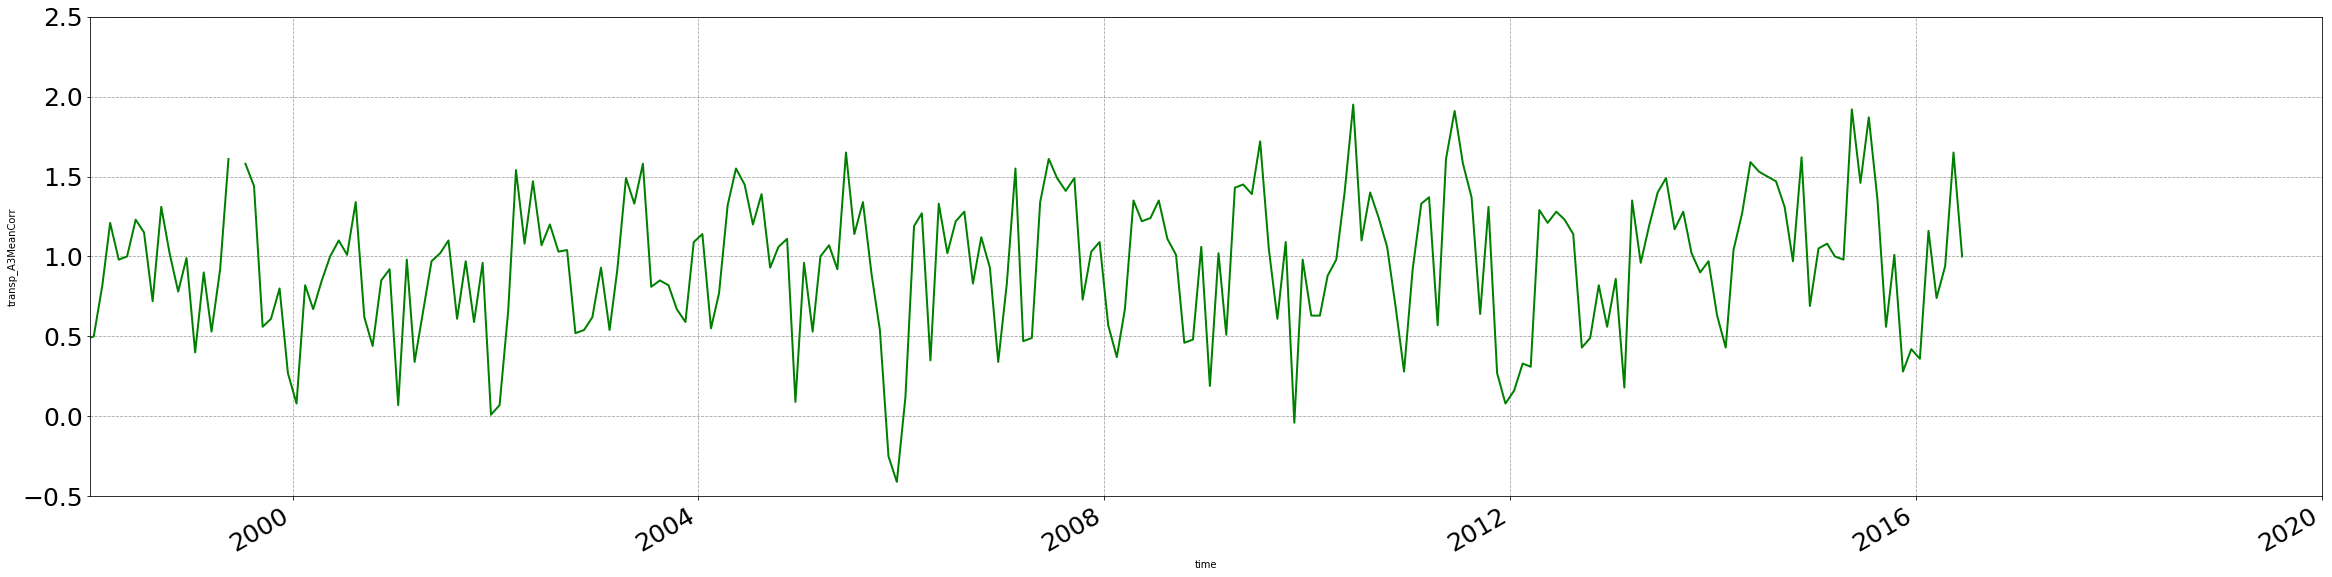

In [7]:
if True:
    plt.figure(figsize=(40,30))
    # Volume transport
    #------------------------------------------------------------------------------------
    plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
    ax=plt.subplot(311)
    ds_Obs['transp_A3MeanCorr'].plot(color='g',linewidth=2.)

    plt.xlim(['1998','2020'])
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.ylim([-0.5,2.5])
    plt.grid(True,linestyle='--', color='grey',alpha=0.7)

>> # Read GLORYS12V1 data and compute transport

In [8]:
#syear_GLORYS12V1AExMercL75=2000  ; eyear_GLORYS12V1AExMercL75=2022
syear_GLORYS12V1AExMercL75=1993  ; eyear_GLORYS12V1AExMercL75=2020

if True: 
    # Read Glorys data (CMEMS-MercL75ator contract) once interpolated over 75 levels over 2016-2018 only
    transp_GLORYS12V1AExMercL75, \
    HT_GLORYS12V1AExMercL75, \
    FW_GLORYS12V1AExMercL75, \
    yearsGLORYS12V1AExMercL75, \
    transp2D_GLORYS12V1AExMercL75, \
    depth1D_GLORYS12V1AExMercL75, \
    Tmean_GLORYS12V1AExMercL75, \
    Smean_GLORYS12V1AExMercL75 = \
    read_sim(sim2read='GLORYS12V1AExMercL75-ORCA12', bdys='north', \
             s_year=syear_GLORYS12V1AExMercL75, e_year=eyear_GLORYS12V1AExMercL75)

BERING

			READ INPUT DATA FROM  GLORYS12V1 interpolated on the CREG12.L75-REF09 grid
/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/BDYS/BERING/
                         Read year: 1993
                         Read year: 1994
                         Read year: 1995
                         Read year: 1996
                         Read year: 1997
                         Read year: 1998
                         Read year: 1999
                         Read year: 2000
                         Read year: 2001
                         Read year: 2002
                         Read year: 2003
                         Read year: 2004
                         Read year: 2005
                         Read year: 2006
                         Read year: 2007
                         Read year: 2008
                         Read year: 2009
                         Read year: 2010
                         Read year: 2011
                         Read year: 2012
      

>>>>>> ## Plot volume, heat and freshwater time-series 

In [9]:
# Switch from daily to monthly mean based on Dataset 
ds_daily=xr.Dataset()
ds_daily['transp_GLORYS12V1AExMercL75']=(('time'),transp_GLORYS12V1AExMercL75) 
ds_daily['FW_GLORYS12V1AExMercL75']=(('time'),FW_GLORYS12V1AExMercL75)
ds_daily['HT_GLORYS12V1AExMercL75']=(('time'),HT_GLORYS12V1AExMercL75)
ds_daily.coords['time']=pd.date_range(start=str(syear_GLORYS12V1AExMercL75)+'-01-01',\
                                      end=str(eyear_GLORYS12V1AExMercL75)+'-12-31',freq='D')
ds_daily

<xarray.Dataset>
Dimensions:                      (time: 10227)
Coordinates:
  * time                         (time) datetime64[ns] 1993-01-01 ... 2020-12-31
Data variables:
    transp_GLORYS12V1AExMercL75  (time) float64 1.107e+06 9.273e+05 ... 1.57e+06
    FW_GLORYS12V1AExMercL75      (time) float64 9.065e+04 ... 1.194e+05
    HT_GLORYS12V1AExMercL75      (time) float64 1.779e+12 ... 1.164e+13

In [10]:
# Resample from daily to monthly means
ds_M=xr.Dataset()
ds_M['transp_GLORYS12V1AExMercL75']=(('time'),ds_daily['transp_GLORYS12V1AExMercL75'].resample(time="1M").mean())
ds_M['FW_GLORYS12V1AExMercL75']=(('time'),ds_daily['FW_GLORYS12V1AExMercL75'].resample(time="1M").mean())
ds_M['HT_GLORYS12V1AExMercL75']=(('time'),ds_daily['HT_GLORYS12V1AExMercL75'].resample(time="1M").mean())
ds_M.coords['time']=pd.date_range(start=str(syear_GLORYS12V1AExMercL75)+'-01',\
                                  end=str(eyear_GLORYS12V1AExMercL75)+'-12',freq='MS')+ pd.DateOffset(days=14)


In [11]:
# Mean value and std over a specific time window
if True:
    # Range over wich mean and STD are computed
    calmean_s=2000  ; calmean_e=2015

    ds_M['transp_GLORYS12V1AExMercL75'].attrs=\
    {'Std':np.array(ds_M['transp_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-6,\
     'Mean':np.array(ds_M['transp_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-6}
    ds_M['FW_GLORYS12V1AExMercL75'].attrs=\
    {'Std':np.array(ds_M['FW_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-6,\
     'Mean':np.array(ds_M['FW_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-6}
    ds_M['HT_GLORYS12V1AExMercL75'].attrs=\
    {'Std':np.array(ds_M['HT_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-12,\
     'Mean':np.array(ds_M['HT_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-12}


In [12]:
# Save the preliminary data:
if True:
    ds_daily.to_netcdf('./DATA/GLORYS12V1AExMercL75_Bering_TP_FW_HT_Daily_TiSe_y'+str(syear_GLORYS12V1AExMercL75)+str(eyear_GLORYS12V1AExMercL75)+'.nc')
    ds_M.to_netcdf('./DATA/GLORYS12V1AExMercL75_Bering_TP_FW_HT_Monthly_TiSe_y'+str(syear_GLORYS12V1AExMercL75)+str(eyear_GLORYS12V1AExMercL75)+'.nc')

In [13]:
ds_M.time

<xarray.DataArray 'time' (time: 336)>
array(['1993-01-15T00:00:00.000000000', '1993-02-15T00:00:00.000000000',
       '1993-03-15T00:00:00.000000000', ..., '2020-10-15T00:00:00.000000000',
       '2020-11-15T00:00:00.000000000', '2020-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-12-15

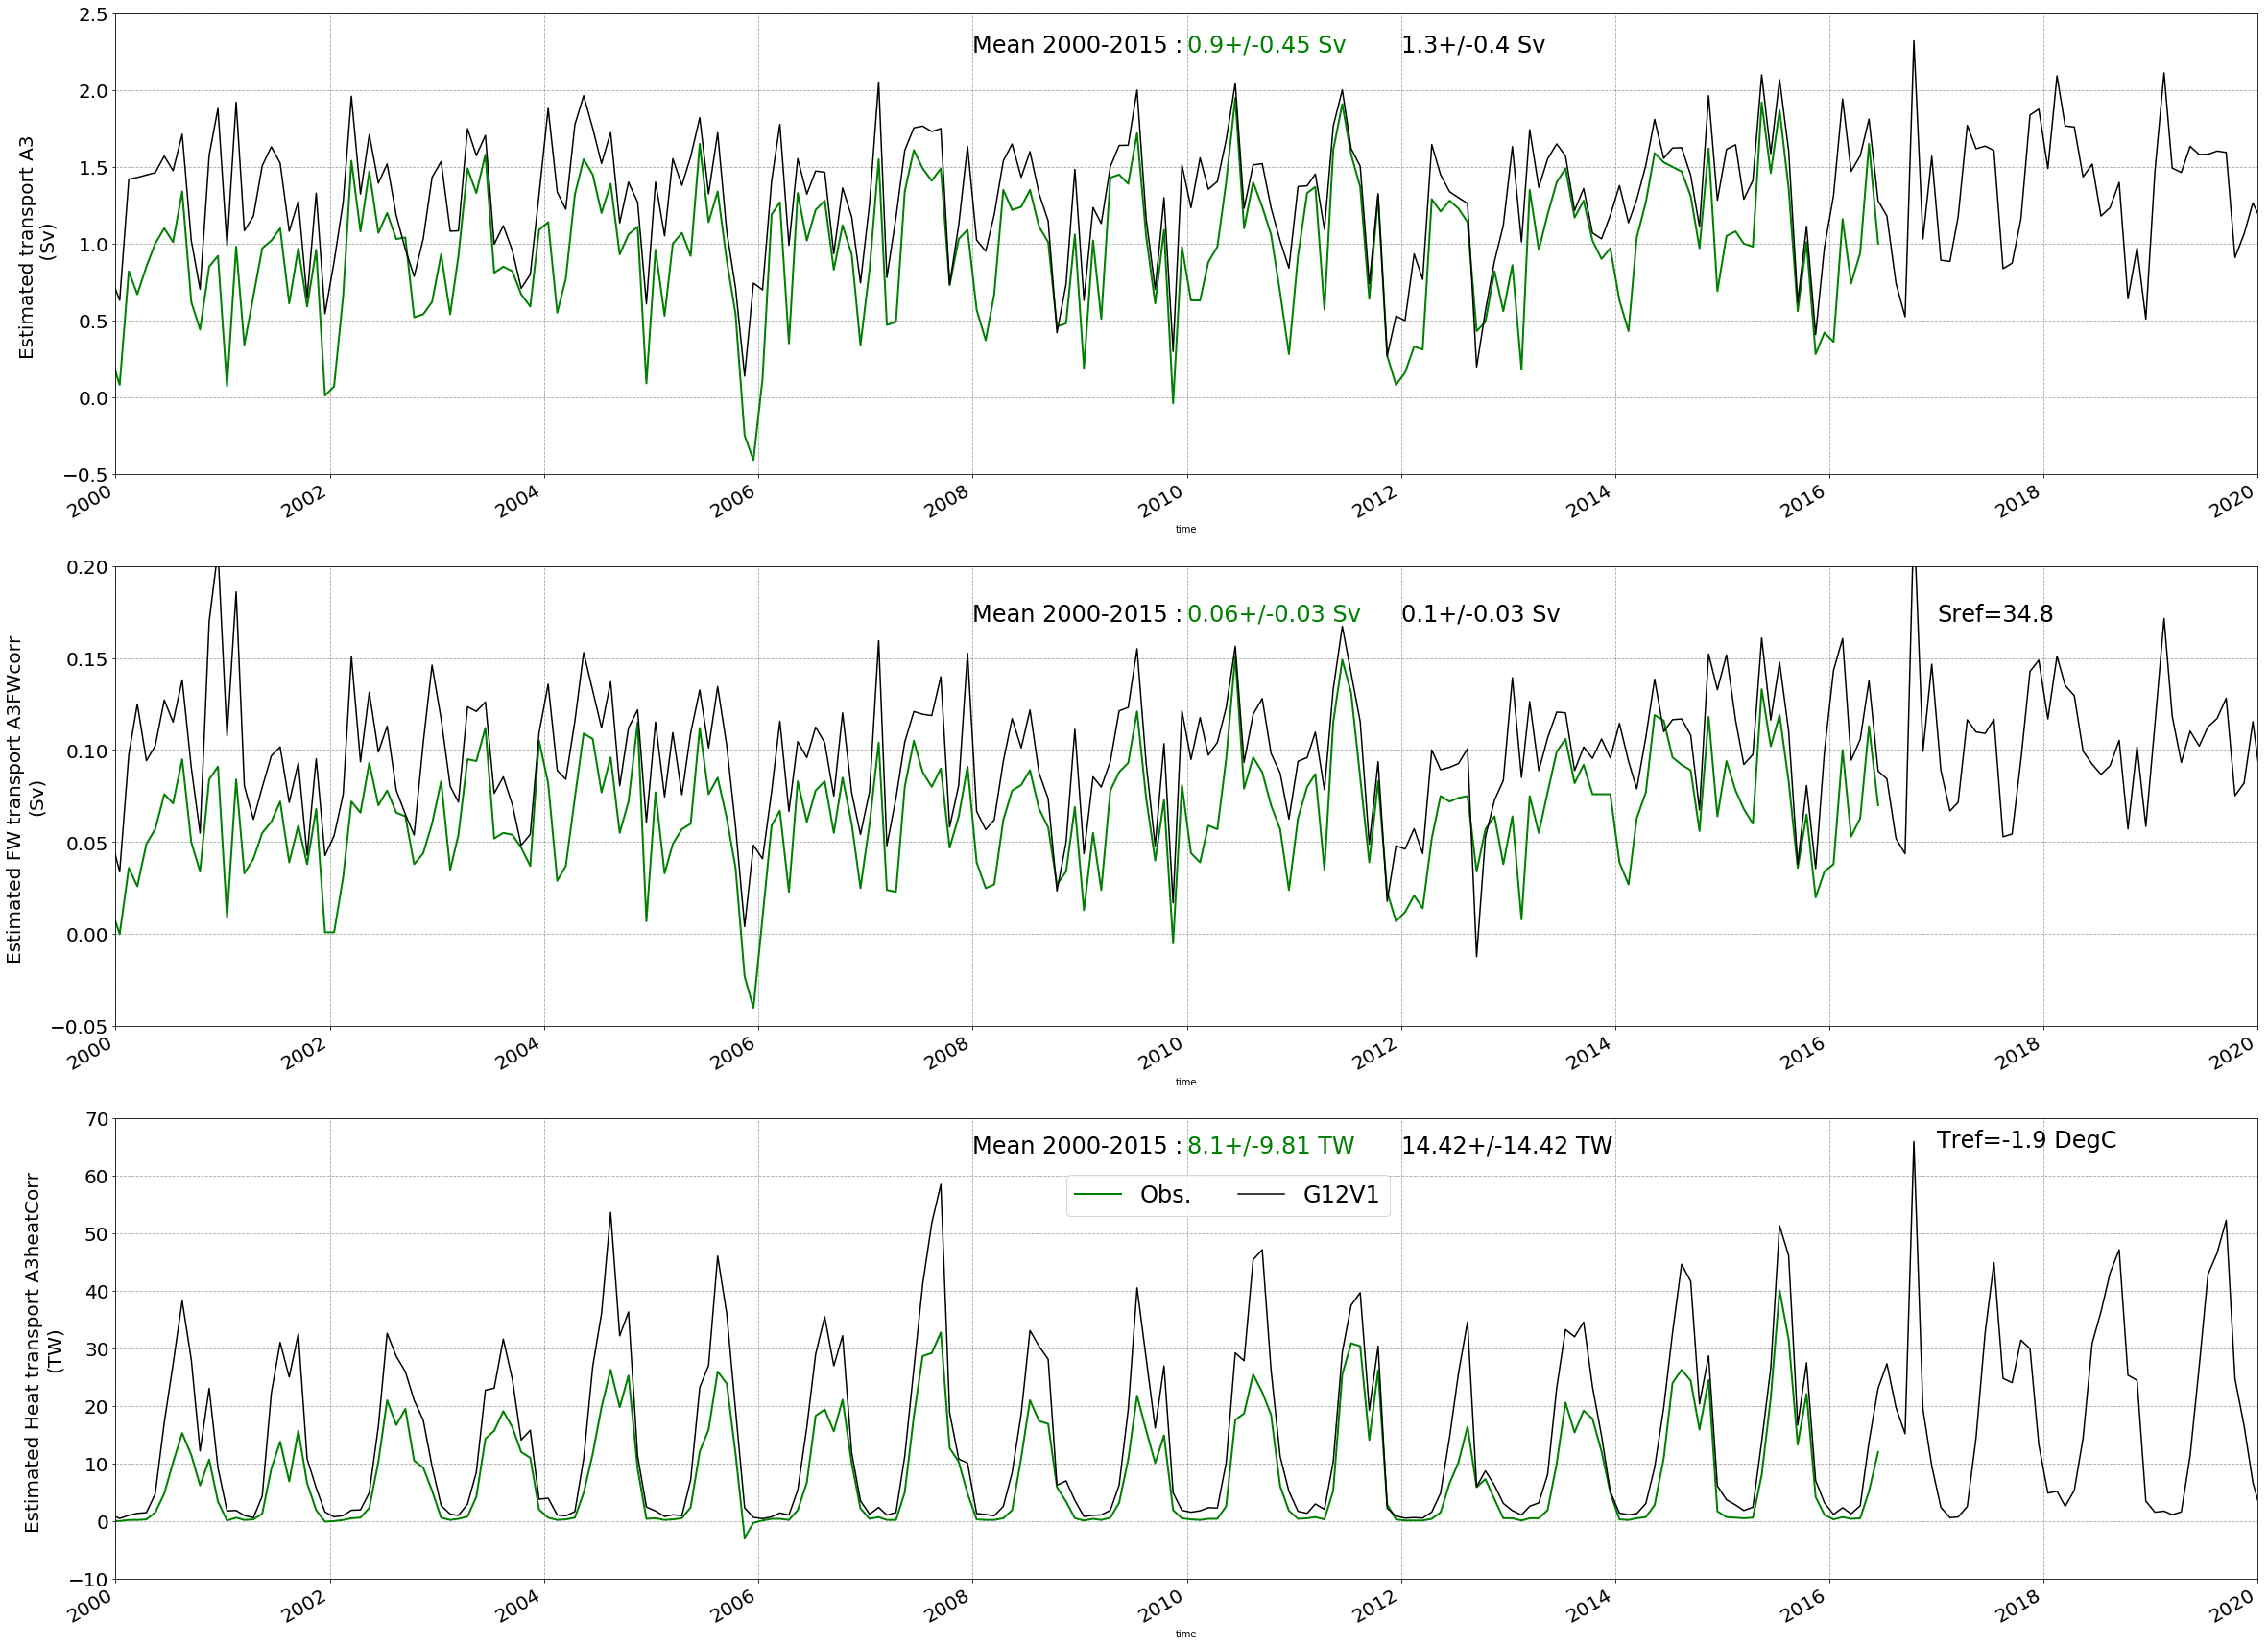

In [14]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015

# Volume transport
#------------------------------------------------------------------------------------
plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
ax=plt.subplot(311)
ds_Obs['transp_A3MeanCorr'].plot(color='g',linewidth=2.)
(ds_M['transp_GLORYS12V1AExMercL75']*1e-6).plot(color='k')

ax.text('2008',2.25   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',2.25   ,str(np.round(np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(transp_A3MeanCorr_std)+' Sv',color='g',size=24)
ax.text('2012',2.25   ,str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Mean,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='k',size=24)

plt.xlim(['2000','2020'])
plt.ylim([-0.5,2.5])
plt.ylabel('Estimated transport A3 \n (Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# FW transport
#------------------------------------------------------------------------------------
ax=plt.subplot(312)
ds_Obs['FW_A3FWcorr'].plot(color='g',linewidth=2.)
(ds_M['FW_GLORYS12V1AExMercL75']*1e-6).plot(color='k')

ax.text('2008',0.17   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',0.17   ,str(np.round(np.nanmean(FW_A3FWcorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]) ,decimals=2))+'+/-'+str(FW_A3FWcorr_std)+' Sv',color='g',size=24)
ax.text('2012',0.17   ,str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Mean,decimals=2))+'+/-'+str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='k',size=24)
ax.text('2017',0.17   ,'Sref=34.8',color='k',size=24)

plt.xlim(['2000','2020'])
plt.ylim([-0.05,0.2])
plt.ylabel('Estimated FW transport A3FWcorr \n'+r'(Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# Heat transport
#------------------------------------------------------------------------------------
ax=plt.subplot(313)
ds_Obs['HT_A3heatCorr'].plot(color='g',linewidth=2.,label='Obs.')
(ds_M['HT_GLORYS12V1AExMercL75']*1e-12).plot(color='k',label='G12V1')

ax.text('2008',64.   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',64.   ,str(np.round(np.nanmean(HT_A3heatCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(HT_A3heatCorr_std)+' TW',color='g',size=24)
ax.text('2012',64.   ,str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+'+/-'+str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+' TW',color='k',size=24)
ax.text('2017',65.   ,'Tref=-1.9 DegC',color='k',size=24)

plt.xlim(['2000','2020'])
plt.ylabel('Estimated Heat transport A3heatCorr \n'+r'(TW)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
plt.ylim([-10.,70.])

plt.legend(bbox_to_anchor=(0., 0.8, 0.6, 0.102),ncol=2, fontsize=24)

#plt.legend(bbox_to_anchor=(0., 1.17, 1., 0.102), ncol=3, mode="expand", borderaxespad=0.)
#leg = plt.gca().get_legend()
#ltext  = leg.get_texts()
#plt.setp(ltext, fontsize=6.)

#plt.tight_layout()
dosavefig=False
if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_monthlymeans_March2023_y20002020.pdf')
dosavefig=False


>>>>>> # Plot the seasonal cycle over 1993-2022

1.2965368292414199
0.09641775811459308
14.49623906798179


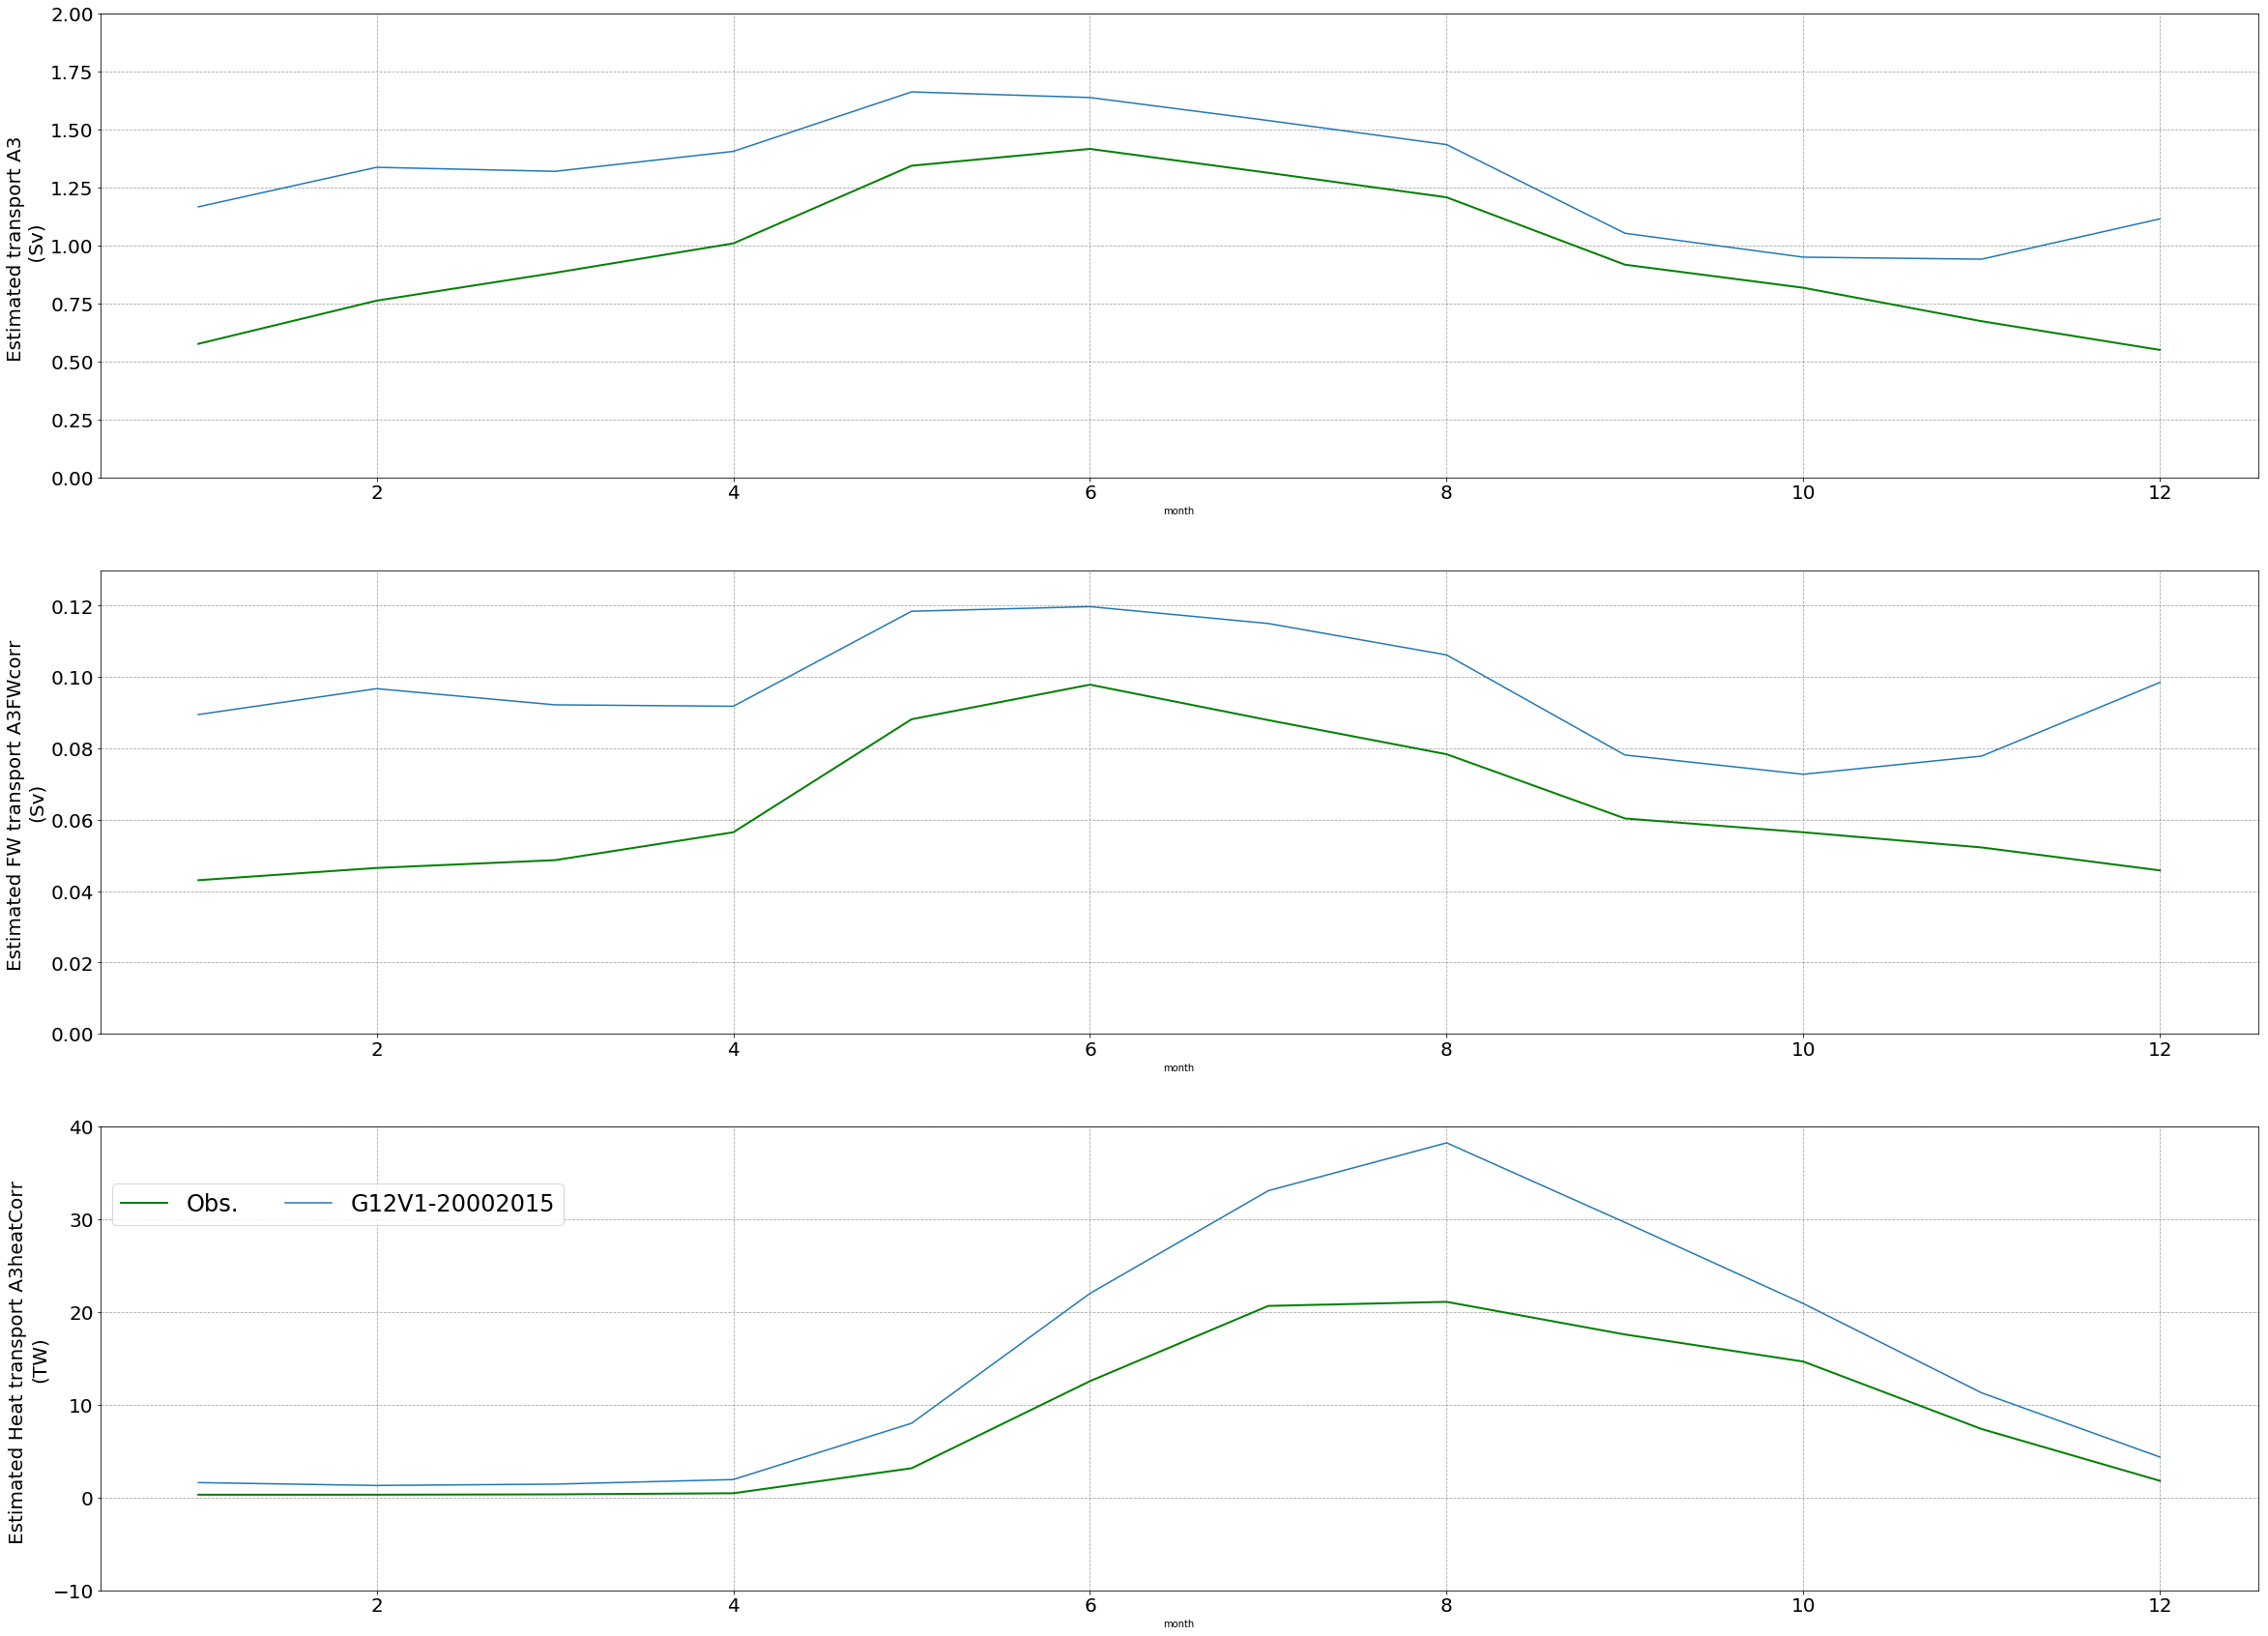

In [42]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015
calmean_longs=1993  ; calmean_longe=2020

# Volume transport
#------------------------------------------------------------------------------------
plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
ax=plt.subplot(311)
ds_Obs['transp_A3MeanCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.)
(ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot()
#(ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r')


Mean_TP_GLORYS12V1AExMercL75_S=np.array((ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_TP_GLORYS12V1AExMercL75_L=np.array((ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_TP_GLORYS12V1AExMercL75_S, Mean_TP_GLORYS12V1AExMercL75_L)
print(Mean_TP_GLORYS12V1AExMercL75_S)
#ax.text('2008',2.25   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',2.25   ,str(np.round(np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(transp_A3MeanCorr_std)+' Sv',color='g',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1)),color='r',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='r',size=24)



#plt.xlim(['2000','2020'])
plt.ylim([0.,2.])
plt.ylabel('Estimated transport A3 \n (Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
# FW transport
#------------------------------------------------------------------------------------
ax=plt.subplot(312)
ds_Obs['FW_A3FWcorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.)
(ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot()
#(ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r')

Mean_FW_GLORYS12V1AExMercL75_S=np.array((ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_FW_GLORYS12V1AExMercL75_L=np.array((ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_FW_GLORYS12V1AExMercL75_S, Mean_FW_GLORYS12V1AExMercL75_L)
print(Mean_FW_GLORYS12V1AExMercL75_S)
#ax.text('2008',0.17   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',0.17   ,str(np.round(np.nanmean(FW_A3FWcorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]) ,decimals=2))+'+/-'+str(FW_A3FWcorr_std)+' Sv',color='g',size=24)
#ax.text('2012',0.17   ,str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Mean,decimals=2))+'+/-'+str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='k',size=24)
#ax.text('2017',0.17   ,'Sref=34.8',color='k',size=24)
#plt.xlim(['2000','2020'])
plt.ylim([0.0,0.13])
plt.ylabel('Estimated FW transport A3FWcorr \n'+r'(Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# Heat transport
#------------------------------------------------------------------------------------
ax=plt.subplot(313)
ds_Obs['HT_A3heatCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.,label='Obs.')
(ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot(label='G12V1-20002015')
#(ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r',label='G12V1-19932020')

Mean_HT_GLORYS12V1AExMercL75_S=np.array((ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_HT_GLORYS12V1AExMercL75_L=np.array((ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_HT_GLORYS12V1AExMercL75_S, Mean_HT_GLORYS12V1AExMercL75_L)
print(Mean_HT_GLORYS12V1AExMercL75_S)
#ax.text('2008',64.   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',64.   ,str(np.round(np.nanmean(HT_A3heatCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(HT_A3heatCorr_std)+' TW',color='g',size=24)
#ax.text('2012',64.   ,str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+'+/-'+str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+' TW',color='k',size=24)
#ax.text('2017',65.   ,'Tref=-1.9 DegC',color='k',size=24)

#plt.xlim(['2000','2020'])
plt.ylabel('Estimated Heat transport A3heatCorr \n'+r'(TW)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
plt.ylim([-10.,40.])

plt.legend(bbox_to_anchor=(0., 0.8, 0.6, 0.102),ncol=3, fontsize=24)


#plt.tight_layout()
dosavefig=False
#if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_SeasCyc_March2023_y'+str(calmean_s)+str(calmean_e)+'.pdf')
if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_SeasCyc_March2023_y20002020.pdf')
dosavefig=False


>>>> # Now let's correct all meridionnal velocities 

In [16]:
!date

Tue Mar 14 10:20:04 GMT 2023


In [17]:
# Compute the correction velocity based on the net transport difference 
#1 get the surface area of the Bering strait
#2 convert the net transport into a velocity in diving it by this surface
#3 along each longitude of the section remove this velocity corretion to the baratropic component 
#4 recompute the volume, heat and reswater transport to control 

syear_GLORYS12V1AExMercL75=1993  ; eyear_GLORYS12V1AExMercL75=2020



In [18]:
# In case of reading daily data and also possibly leap years
if True:
        daily_time_dim=0
        c_year=syear_GLORYS12V1AExMercL75  ;  e_year=eyear_GLORYS12V1AExMercL75  ; nleapy=0
        while c_year <= e_year :
                ydays=365
                if c_year == 1996  \
                or c_year == 2000  \
                or c_year == 2004  \
                or c_year == 2008  \
                or c_year == 2012  \
                or c_year == 2016  \
                or c_year == 2020  :
                    print('       >>>>>>>>  ',str(c_year),' is a leap year')
                    ydays=366
                    nleapy+=1
                    
                daily_time_dim+=ydays
                c_year+=1
        print(' Total days number over the period '+str(syear_GLORYS12V1AExMercL75)+' - '+str(eyear_GLORYS12V1AExMercL75)+' :'+str(daily_time_dim))

       >>>>>>>>   1996  is a leap year
       >>>>>>>>   2000  is a leap year
       >>>>>>>>   2004  is a leap year
       >>>>>>>>   2008  is a leap year
       >>>>>>>>   2012  is a leap year
       >>>>>>>>   2016  is a leap year
       >>>>>>>>   2020  is a leap year
 Total days number over the period 1993 - 2020 :10227


In [19]:
# Read the data again, velocities, temperature & salinity as vertical/horizontal scale factors.
GVcmp_data_readEx, GTcmp_data_readEx, GScmp_data_readEx, \
cmp_data_read_depthEx, cmp_ze1vEx, cmp_data_read_dzEx, \
sizes_IDEx, cmp_lonEx = read_sim_GLORYS12V1AExMercL75(bdys='north', \
                                                      s_year=syear_GLORYS12V1AExMercL75, \
                                                      e_year=eyear_GLORYS12V1AExMercL75)

BERING

			READ INPUT DATA FROM  GLORYS12V1 interpolated on the CREG12.L75-REF09 grid
/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/BDYS/BERING/
                         Read year: 1993
                         Read year: 1994
                         Read year: 1995
                         Read year: 1996
                         Read year: 1997
                         Read year: 1998
                         Read year: 1999
                         Read year: 2000
                         Read year: 2001
                         Read year: 2002
                         Read year: 2003
                         Read year: 2004
                         Read year: 2005
                         Read year: 2006
                         Read year: 2007
                         Read year: 2008
                         Read year: 2009
                         Read year: 2010
                         Read year: 2011
                         Read year: 2012
      

In [20]:
# Reload daily & monthly mean previously computed 
if False: 
    ds_daily=xr.open_dataset('./DATA/GLORYS12V1AExMercL75_Bering_TP_FW_HT_Daily_TiSe_y'+str(syear_GLORYS12V1AExMercL75)+str(eyear_GLORYS12V1AExMercL75)+'.nc')
    ds_M=xr.open_dataset('./DATA/GLORYS12V1AExMercL75_Bering_TP_FW_HT_Monthly_TiSe_y'+str(syear_GLORYS12V1AExMercL75)+str(eyear_GLORYS12V1AExMercL75)+'.nc')

In [21]:
# Read the vmask
file='./CREG12.L75-REF09_mesh_mask_Bering_Glorys12v1_Tgt.nc'
field = Dataset(file)
cmp_data_read_vmaskEx = np.squeeze(field.variables['vmask'])
cmp_data_read_vmaskEx_4D = np.tile(cmp_data_read_vmaskEx, (daily_time_dim,1,1,1)) 

In [22]:
GTcmp_data_readEx.shape

(10227, 75, 10, 42)

In [23]:
# Compute the area of each vertical cell at V-point
#######sec_area=np.zeros((cmp_data_read_dz_north.shape[0],cmp_data_read_dz_north.shape[1]))
sec_area=cmp_data_read_dzEx[:,:,:] * cmp_ze1vEx[:,:] * cmp_data_read_vmaskEx[:,:,:]
sec_area_lat=np.sum(sec_area,axis=(0,2))

In [24]:
# Compute the T/S mean at the meridionnal velocity grid point
GTdata_read_VEx= np.zeros((daily_time_dim,sizes_IDEx.shape[1],sizes_IDEx.shape[2],sizes_IDEx.shape[3]))
GSdata_read_VEx= np.zeros((daily_time_dim,sizes_IDEx.shape[1],sizes_IDEx.shape[2],sizes_IDEx.shape[3]))
# Scan all zonal sections
for ilat in set(np.arange(9)):
    GTdata_read_VEx[:,:,ilat,:] = 0.5 * (GTcmp_data_readEx[:,:,ilat,:] + GTcmp_data_readEx[:,:,ilat+1,:] )
    GSdata_read_VEx[:,:,ilat,:] = 0.5 * (GScmp_data_readEx[:,:,ilat,:] + GScmp_data_readEx[:,:,ilat+1,:] )

In [25]:
# Compute the mean transport from Obs. & exp. over the considered period:
calmean_s=2000  ;  calmean_e=2015
Obs_meanTP=np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12])
Exp_meanTP=np.array(ds_M['transp_GLORYS12V1AExMercL75'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-6
Delta_transp=Exp_meanTP-Obs_meanTP
Alpha_Cor=Obs_meanTP/Exp_meanTP
print('The transport difference is about: '+str(Delta_transp)+' Sv')
print('The alpha correction is about: '+str(np.round(Alpha_Cor,decimals=2)))
# For memory: The transport difference is about: 0.34953682924142004 Sv

The transport difference is about: 0.34953682924142004 Sv
The alpha correction is about: 0.73


In [26]:
# Compute for each raw(latitude) a velocity correction
# NB: the signof the correction becasue of the CREG grid orientation 
Vel_cor_lat=-Delta_transp*1e6/sec_area_lat
Vel_cor_lat
# For memory: array([-0.09518694, -0.09232508, -0.08876018, -0.08626357, -0.07957529,
#                    -0.07144652, -0.06466553, -0.05905472, -0.05503485, -0.05203489])

array([-0.09518694, -0.09232508, -0.08876018, -0.08626357, -0.07957529,
       -0.07144652, -0.06466553, -0.05905472, -0.05503485, -0.05203489])

In [27]:
# Apply the correction
######################
GVcmp_data_CorEx=np.zeros(GVcmp_data_readEx.shape)

for ilat in set(np.arange(Vel_cor_lat.shape[0])):
    GVcmp_data_CorEx[:,:,ilat,:] = GVcmp_data_readEx[:,:,ilat,:]*Alpha_Cor*cmp_data_read_vmaskEx_4D[:,:,ilat,:]
    #GVcmp_data_CorEx[:,:,ilat,:] = (GVcmp_data_readEx[:,:,ilat,:]-Vel_cor_lat[ilat])*cmp_data_read_vmaskEx_4D[:,:,ilat,:]

GVcmp_data_CorEx.shape

(10227, 75, 10, 42)

In [28]:
# Apply the correction in a cleaner way
#######################################
ds_new=xr.Dataset()
ds_new['vomecrty']= (('time_counter','z','y','x'),GVcmp_data_readEx[:,:,:,:]*Alpha_Cor*cmp_data_read_vmaskEx_4D[:,:,:,:])
ds_new['vomecrty']=xr.where(cmp_data_read_vmaskEx_4D < 1, -9999.,ds_new['vomecrty'])
ds_new.coords['time_counter']= pd.date_range(start=str(syear_GLORYS12V1AExMercL75)+'-01-01', end=str(eyear_GLORYS12V1AExMercL75)+'-12-31',freq='D')


In [29]:
ds_new

<xarray.Dataset>
Dimensions:       (time_counter: 10227, x: 42, y: 10, z: 75)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1993-01-01 ... 2020-12-31
Dimensions without coordinates: x, y, z
Data variables:
    vomecrty      (time_counter, z, y, x) float64 -9.999e+03 ... -9.999e+03

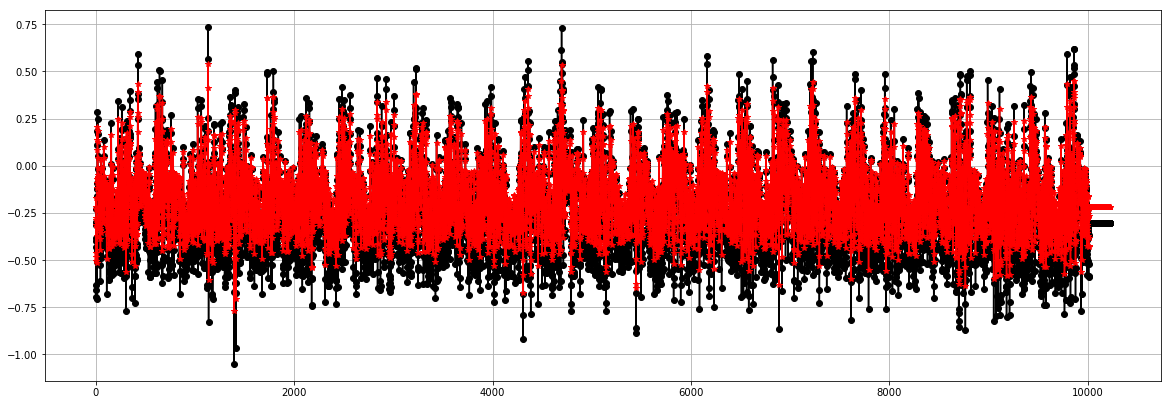

In [27]:
# Control plot to compare the state before the correction and after 
chk=False
if chk :
    plt.figure(figsize=(20,15))
    ik=0 ; ilon=12  ; ilat=0
    plt.subplot(211)
    plt.plot(GVcmp_data_readEx[:,ik,ilat,ilon],'k-o')
    plt.plot(GVcmp_data_CorEx[:,ik,ilat,ilon],'r-*')
    plt.grid(True)

In [30]:
# Control the calculation:
Gnet_volu_trans2DEx_Latcor=np.zeros((daily_time_dim,sizes_IDEx.shape[1],sizes_IDEx.shape[2],sizes_IDEx.shape[3]))
Gnet_heat_trans2DEx_Latcor=np.zeros((daily_time_dim,sizes_IDEx.shape[1],sizes_IDEx.shape[2],sizes_IDEx.shape[3]))
Gnet_salt_trans2DEx_Latcor=np.zeros((daily_time_dim,sizes_IDEx.shape[1],sizes_IDEx.shape[2],sizes_IDEx.shape[3]))

Gnet_volu_transEx_Latcor=np.zeros( (daily_time_dim,sizes_IDEx.shape[2]) )
Gnet_heat_transEx_Latcor=np.zeros(( daily_time_dim,sizes_IDEx.shape[2]) )
Gnet_salt_transEx_Latcor=np.zeros(( daily_time_dim,sizes_IDEx.shape[2] ))

# Compute a positive northward flux
fac_north=-1.
Sref=34.8    ;   Tref=-1.9
rhocp=1023.*3900.

for ti in set(np.arange(Gnet_volu_transEx_Latcor.shape[0])):
    Gnet_volu_trans2DEx_Latcor[ti,:,:,:] =  fac_north*(GVcmp_data_CorEx[ti,:,:,:]) * cmp_data_read_dzEx[:,:,:] * cmp_ze1vEx[:,:] * cmp_data_read_vmaskEx[:,:,:]      # [ m3 s-1 ] 
    Gnet_heat_trans2DEx_Latcor[ti,:,:,:] =  Gnet_volu_trans2DEx_Latcor[ti,:,:,:] * (GTdata_read_VEx[ti,:,:,:]-Tref) * rhocp        # [ W ]
    Gnet_salt_trans2DEx_Latcor[ti,:,:,:] =  Gnet_volu_trans2DEx_Latcor[ti,:,:,:] * (Sref-GSdata_read_VEx[ti,:,:,:])/Sref           # [ m3 s-1 ] 
                
Gnet_volu_transEx_Latcor[:,:] = np.sum(Gnet_volu_trans2DEx_Latcor[:,:,:,:],axis=(1,3))
Gnet_heat_transEx_Latcor[:,:] = np.sum(Gnet_heat_trans2DEx_Latcor[:,:,:,:],axis=(1,3))
Gnet_salt_transEx_Latcor[:,:] = np.sum(Gnet_salt_trans2DEx_Latcor[:,:,:,:],axis=(1,3))

In [31]:
ds_daily

<xarray.Dataset>
Dimensions:                      (time: 10227)
Coordinates:
  * time                         (time) datetime64[ns] 1993-01-01 ... 2020-12-31
Data variables:
    transp_GLORYS12V1AExMercL75  (time) float64 ...
    FW_GLORYS12V1AExMercL75      (time) float64 ...
    HT_GLORYS12V1AExMercL75      (time) float64 ...

In [32]:
# Save the daily new data 
ds_daily['transp_GLORYS12V1AExMercL75_COR']=(('time'),Gnet_volu_transEx_Latcor[:,0].squeeze()) 
ds_daily['FW_GLORYS12V1AExMercL75_COR']=(('time'),Gnet_salt_transEx_Latcor[:,0].squeeze())
ds_daily['HT_GLORYS12V1AExMercL75_COR']=(('time'),Gnet_heat_transEx_Latcor[:,0].squeeze())
ds_daily

<xarray.Dataset>
Dimensions:                          (time: 10227)
Coordinates:
  * time                             (time) datetime64[ns] 1993-01-01 ... 2020-12-31
Data variables:
    transp_GLORYS12V1AExMercL75      (time) float64 ...
    FW_GLORYS12V1AExMercL75          (time) float64 ...
    HT_GLORYS12V1AExMercL75          (time) float64 ...
    transp_GLORYS12V1AExMercL75_COR  (time) float64 8.08e+05 ... 1.143e+06
    FW_GLORYS12V1AExMercL75_COR      (time) float64 6.115e+04 ... 8.235e+04
    HT_GLORYS12V1AExMercL75_COR      (time) float64 1.247e+12 ... 8.558e+12

In [33]:
# The corrected velocities when calculated at once at each latitude 
Gnet_volu_transEx_Latcor[:,0]*1e-6
# For memory 
# array([0.51331414, 0.55158909, 0.33531455, ..., 1.21489471, 1.21489471, 1.21489471])

array([0.8079756 , 0.67574628, 0.77445458, ..., 1.14267226, 1.14267226,
       1.14267226])

In [34]:
ds_daily['transp_GLORYS12V1AExMercL75']*1e-6

<xarray.DataArray 'transp_GLORYS12V1AExMercL75' (time: 10227)>
array([1.10714 , 0.927286, 1.061543, ..., 1.569754, 1.569754, 1.569754])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-12-31

In [35]:
# Resample from daily to monthly means
ds_M['transp_GLORYS12V1AExMercL75_COR']=(('time'),ds_daily['transp_GLORYS12V1AExMercL75_COR'].resample(time="1M").mean())
ds_M['FW_GLORYS12V1AExMercL75_COR']=(('time'),ds_daily['FW_GLORYS12V1AExMercL75_COR'].resample(time="1M").mean())
ds_M['HT_GLORYS12V1AExMercL75_COR']=(('time'),ds_daily['HT_GLORYS12V1AExMercL75_COR'].resample(time="1M").mean())

# Mean value and std over a specific time window 2010-2015 
if True:
    # Range over wich mean and STD are computed
    calmean_s=2000  ; calmean_e=2015

    ds_M['transp_GLORYS12V1AExMercL75_COR'].attrs=\
    {'Std':np.array(ds_M['transp_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-6,\
     'Mean':np.array(ds_M['transp_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-6}
    ds_M['FW_GLORYS12V1AExMercL75_COR'].attrs=\
    {'Std':np.array(ds_M['FW_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-6,\
     'Mean':np.array(ds_M['FW_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-6}
    ds_M['HT_GLORYS12V1AExMercL75_COR'].attrs=\
    {'Std':np.array(ds_M['HT_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).std())*1e-12,\
     'Mean':np.array(ds_M['HT_GLORYS12V1AExMercL75_COR'].sel(time=slice(str(calmean_s),str(calmean_e))).mean())*1e-12}


In [36]:
ds_M.info()

xarray.Dataset {
dimensions:
	time = 336 ;

variables:
	float64 transp_GLORYS12V1AExMercL75(time) ;
		transp_GLORYS12V1AExMercL75:Std = 0.4013943380847191 ;
		transp_GLORYS12V1AExMercL75:Mean = 1.29653682924142 ;
	float64 FW_GLORYS12V1AExMercL75(time) ;
		FW_GLORYS12V1AExMercL75:Std = 0.034417744411056356 ;
		FW_GLORYS12V1AExMercL75:Mean = 0.09641775811459309 ;
	float64 HT_GLORYS12V1AExMercL75(time) ;
		HT_GLORYS12V1AExMercL75:Std = 14.419299109504998 ;
		HT_GLORYS12V1AExMercL75:Mean = 14.496239067981787 ;
	datetime64[ns] time(time) ;
	float64 transp_GLORYS12V1AExMercL75_COR(time) ;
		transp_GLORYS12V1AExMercL75_COR:Std = 0.2938567265854443 ;
		transp_GLORYS12V1AExMercL75_COR:Mean = 0.9444158961594173 ;
	float64 FW_GLORYS12V1AExMercL75_COR(time) ;
		FW_GLORYS12V1AExMercL75_COR:Std = 0.023896726312322432 ;
		FW_GLORYS12V1AExMercL75_COR:Mean = 0.0657471765976427 ;
	float64 HT_GLORYS12V1AExMercL75_COR(time) ;
		HT_GLORYS12V1AExMercL75_COR:Std = 10.610103563924078 ;
		HT_GLORYS12V1AExMercL

In [73]:
# Save the corrected velocity field
# Ref experiment data
DATA_PATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/BDYS/BERING/'

donetcdf=False
if donetcdf: 

    for year in set(np.arange(syear_GLORYS12V1AExMercL75,eyear_GLORYS12V1AExMercL75+1)):
        ds_Glo=xr.open_dataset(DATA_PATH+str(year)+'/'+'GLORYS12V1-CREG12.L75_BERING_y'+str(year)+'.1d_gridV.nc',)

        ds_out=xr.Dataset()  
        ds_out['vomecrty']= (('time_counter','z','y','x'),ds_new['vomecrty'].sel(time_counter=str(year)))
        ds_out['vomecrty'].attrs['_FillValue']= -9999.
        ds_out['vomecrty'].attrs['_ChunkSizes']= ds_Glo['vomecrty'].attrs['_ChunkSizes']
        ds_out['vomecrty'].attrs['associate']= ds_Glo['vomecrty'].attrs['associate']
        ds_out['vomecrty'].attrs['interval_write']=ds_Glo['vomecrty'].attrs['interval_write']
        ds_out['vomecrty'].attrs['long_name']=ds_Glo['vomecrty'].attrs['long_name']
        ds_out['vomecrty'].attrs['short_name']=ds_Glo['vomecrty'].attrs['short_name']
        ds_out['vomecrty'].attrs['standard_name']=ds_Glo['vomecrty'].attrs['standard_name']
        ds_out['vomecrty'].attrs['units']=ds_Glo['vomecrty'].attrs['units']
        
        ds_out['depthv']=(('z'),np.array(ds_Glo['depthv']))
        ds_out['depthv'].attrs['valid_min']=ds_Glo['depthv'].attrs['valid_min']
        ds_out['depthv'].attrs['valid_max']=ds_Glo['depthv'].attrs['valid_max']
        ds_out['nav_lat']=(('y','x'),ds_Glo['nav_lat'])
        ds_out['nav_lat'].attrs['valid_min']=ds_Glo['nav_lat'].attrs['valid_min']
        ds_out['nav_lat'].attrs['valid_max']=ds_Glo['nav_lat'].attrs['valid_max']
        ds_out['nav_lon']=(('y','x'),ds_Glo['nav_lon'])
        ds_out['nav_lon'].attrs['valid_min']=ds_Glo['nav_lon'].attrs['valid_min']
        ds_out['nav_lon'].attrs['valid_max']=ds_Glo['nav_lon'].attrs['valid_max']        
        ds_out['time_counter']=(('time_counter'),ds_new['time_counter'].sel(time_counter=str(year)))

        ds_out.attrs=ds_Glo.attrs
        
        ds_out.to_netcdf(DATA_PATH+str(year)+'/'+'GLORYS12V1-CREG12.L75_BERING-COR_y'+str(year)+'.1d_gridV.nc', unlimited_dims={'time_counter':True})

>>>> ## Control plot 

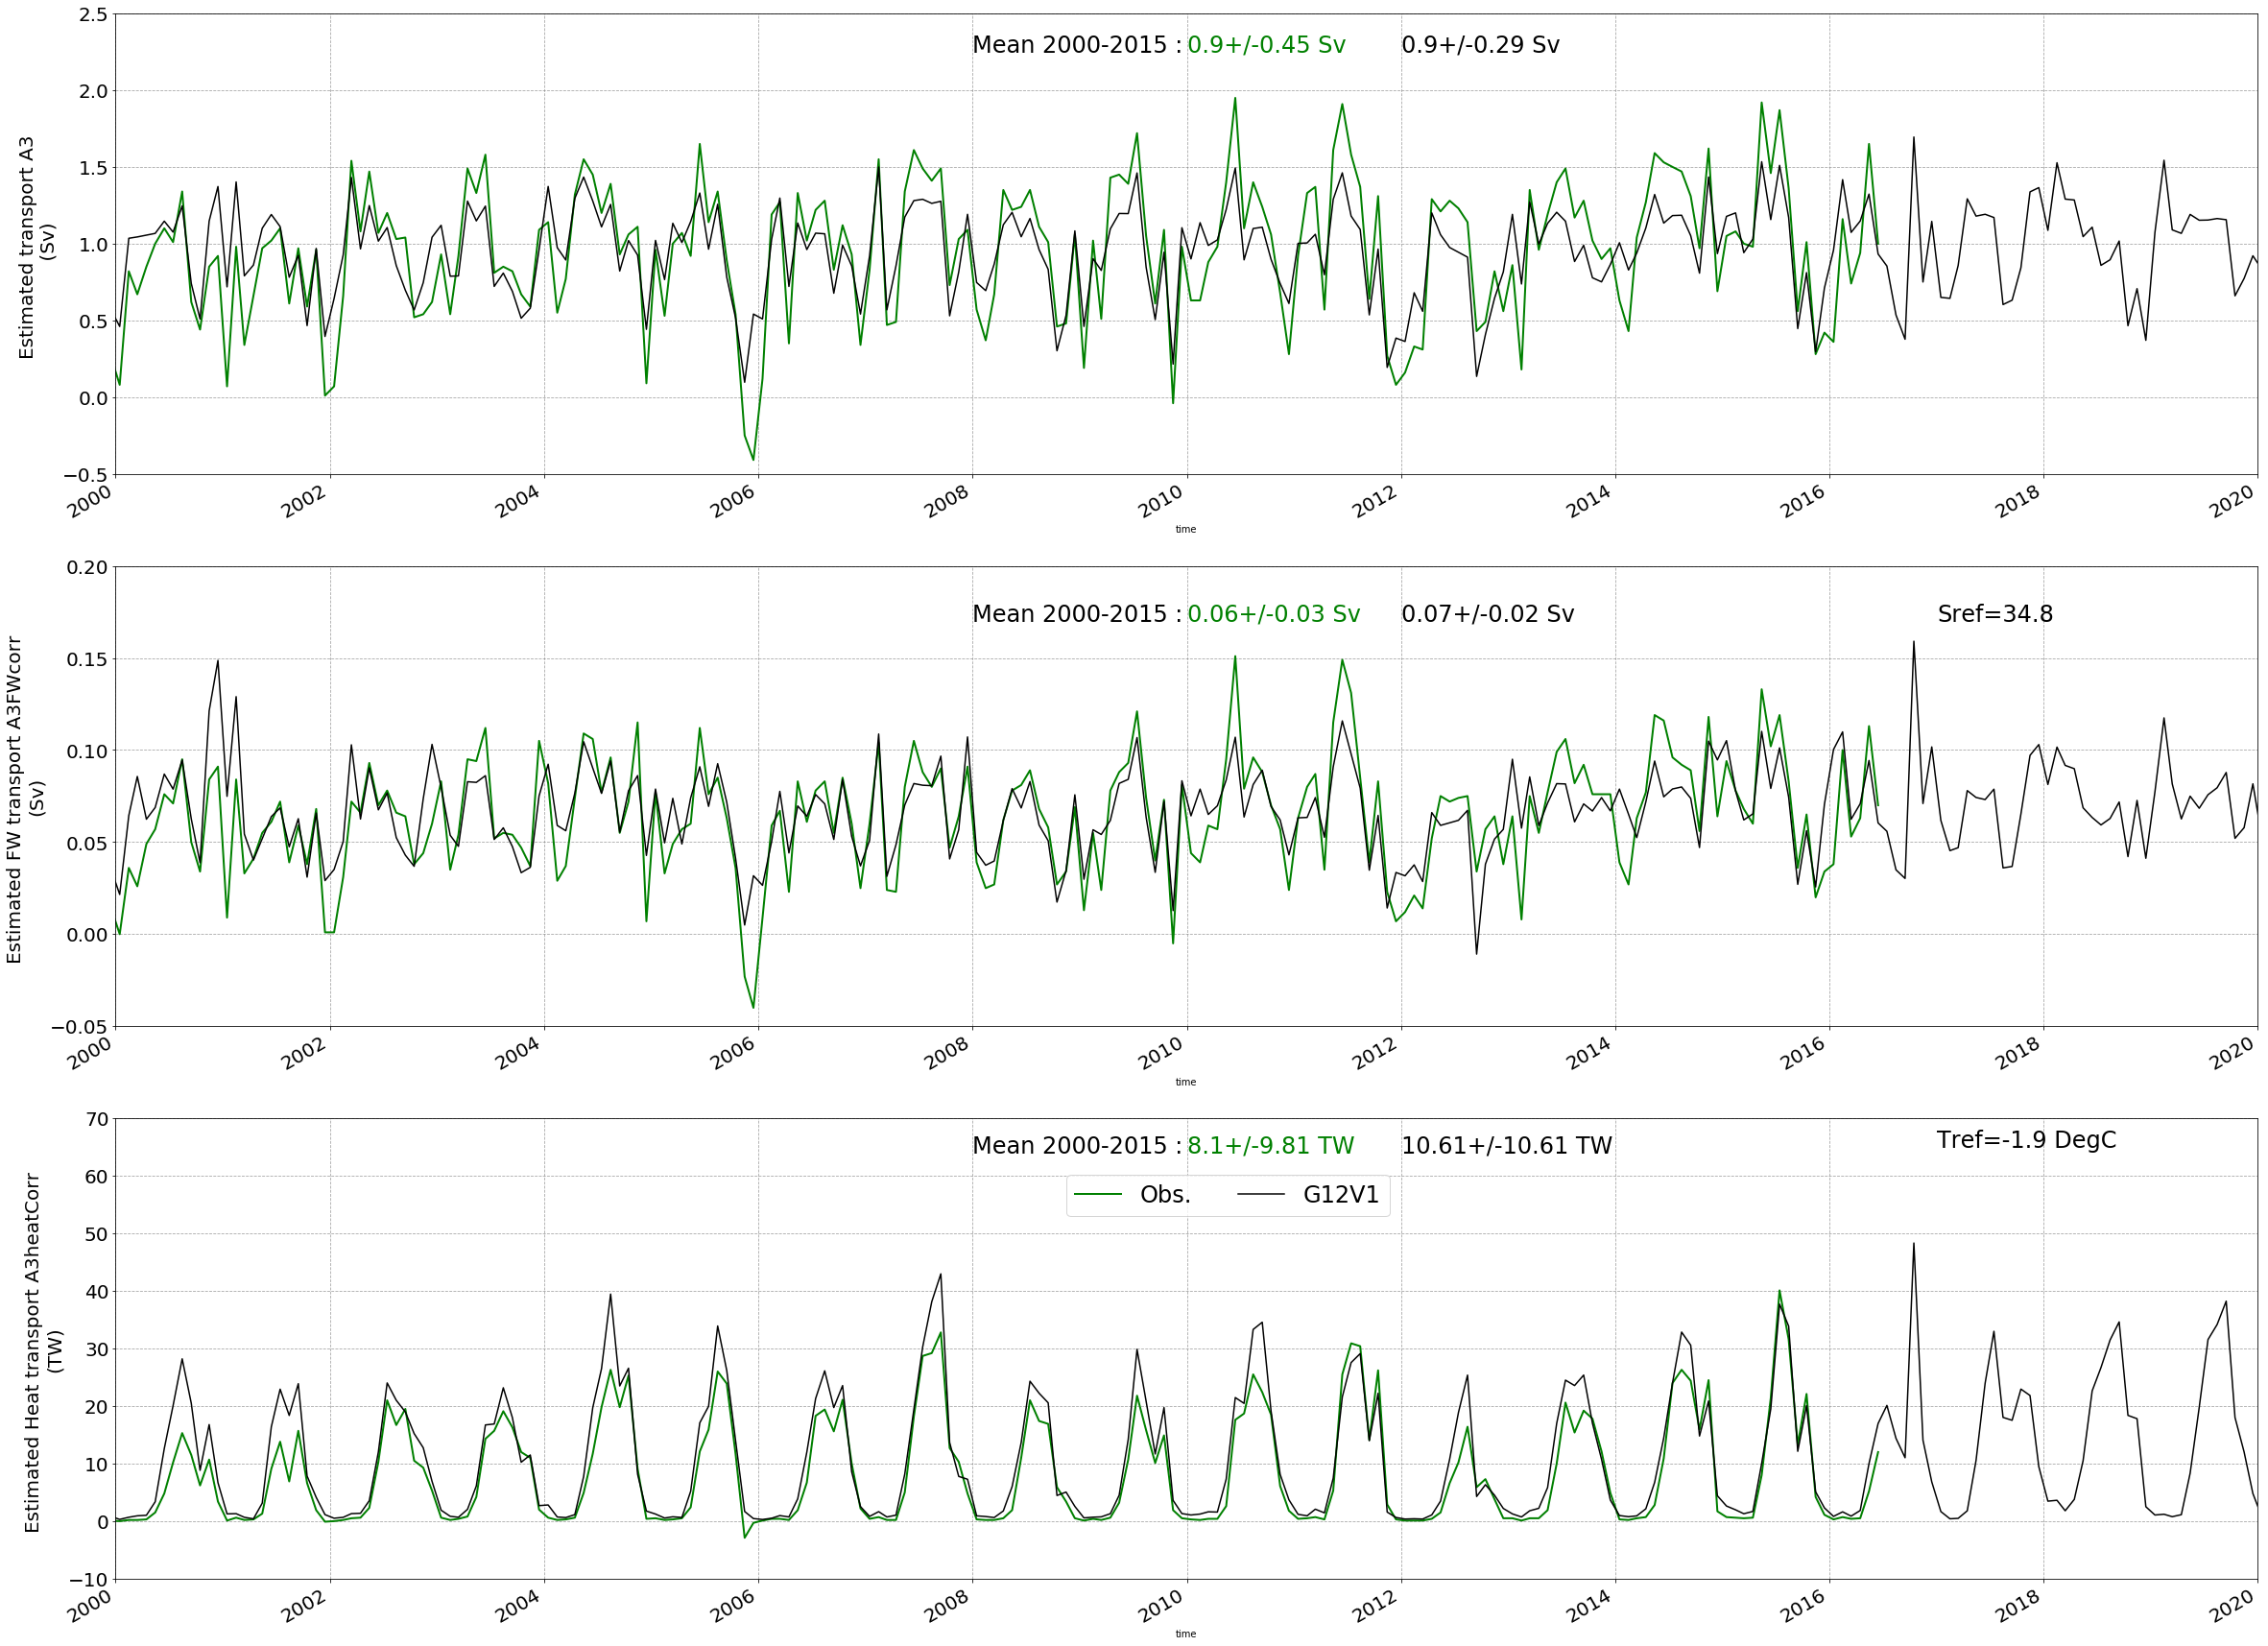

In [37]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015

# Volume transport
#------------------------------------------------------------------------------------
plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
ax=plt.subplot(311)
ds_Obs['transp_A3MeanCorr'].plot(color='g',linewidth=2.)
(ds_M['transp_GLORYS12V1AExMercL75_COR']*1e-6).plot(color='k')

ax.text('2008',2.25   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',2.25   ,str(np.round(np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(transp_A3MeanCorr_std)+' Sv',color='g',size=24)
ax.text('2012',2.25   ,str(np.round(ds_M['transp_GLORYS12V1AExMercL75_COR'].Mean,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75_COR'].Std,decimals=2))+' Sv',color='k',size=24)

plt.xlim(['2000','2020'])
#plt.xlim(['1992','2020'])
plt.ylim([-0.5,2.5])
plt.ylabel('Estimated transport A3 \n (Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# FW transport
#------------------------------------------------------------------------------------
ax=plt.subplot(312)
ds_Obs['FW_A3FWcorr'].plot(color='g',linewidth=2.)
(ds_M['FW_GLORYS12V1AExMercL75_COR']*1e-6).plot(color='k')

ax.text('2008',0.17   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',0.17   ,str(np.round(np.nanmean(FW_A3FWcorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]) ,decimals=2))+'+/-'+str(FW_A3FWcorr_std)+' Sv',color='g',size=24)
ax.text('2012',0.17   ,str(np.round(ds_M['FW_GLORYS12V1AExMercL75_COR'].Mean,decimals=2))+'+/-'+str(np.round(ds_M['FW_GLORYS12V1AExMercL75_COR'].Std,decimals=2))+' Sv',color='k',size=24)
ax.text('2017',0.17   ,'Sref=34.8',color='k',size=24)

plt.xlim(['2000','2020'])
#plt.xlim(['1992','2020'])
plt.ylim([-0.05,0.2])
plt.ylabel('Estimated FW transport A3FWcorr \n'+r'(Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# Heat transport
#------------------------------------------------------------------------------------
ax=plt.subplot(313)
ds_Obs['HT_A3heatCorr'].plot(color='g',linewidth=2.,label='Obs.')
(ds_M['HT_GLORYS12V1AExMercL75_COR']*1e-12).plot(color='k',label='G12V1')

ax.text('2008',64.   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
ax.text('2010',64.   ,str(np.round(np.nanmean(HT_A3heatCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(HT_A3heatCorr_std)+' TW',color='g',size=24)
ax.text('2012',64.   ,str(np.round(ds_M['HT_GLORYS12V1AExMercL75_COR'].Std,decimals=2))+'+/-'+str(np.round(ds_M['HT_GLORYS12V1AExMercL75_COR'].Std,decimals=2))+' TW',color='k',size=24)
ax.text('2017',65.   ,'Tref=-1.9 DegC',color='k',size=24)

plt.xlim(['2000','2020'])
#plt.xlim(['1992','2020'])
plt.ylabel('Estimated Heat transport A3heatCorr \n'+r'(TW)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
plt.ylim([-10.,70.])

plt.legend(bbox_to_anchor=(0., 0.8, 0.6, 0.102),ncol=2, fontsize=24)

#plt.legend(bbox_to_anchor=(0., 1.17, 1., 0.102), ncol=3, mode="expand", borderaxespad=0.)
#leg = plt.gca().get_legend()
#ltext  = leg.get_texts()
#plt.setp(ltext, fontsize=6.)

#plt.tight_layout()
dosavefig=False
if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_monthlymeansCOR_March2023_y20002020.pdf')
dosavefig=False



>>>>>> # Plot the seasonal cycle over 1993-2022

0.9444158961594172
0.06574717659764272
10.580086478828962


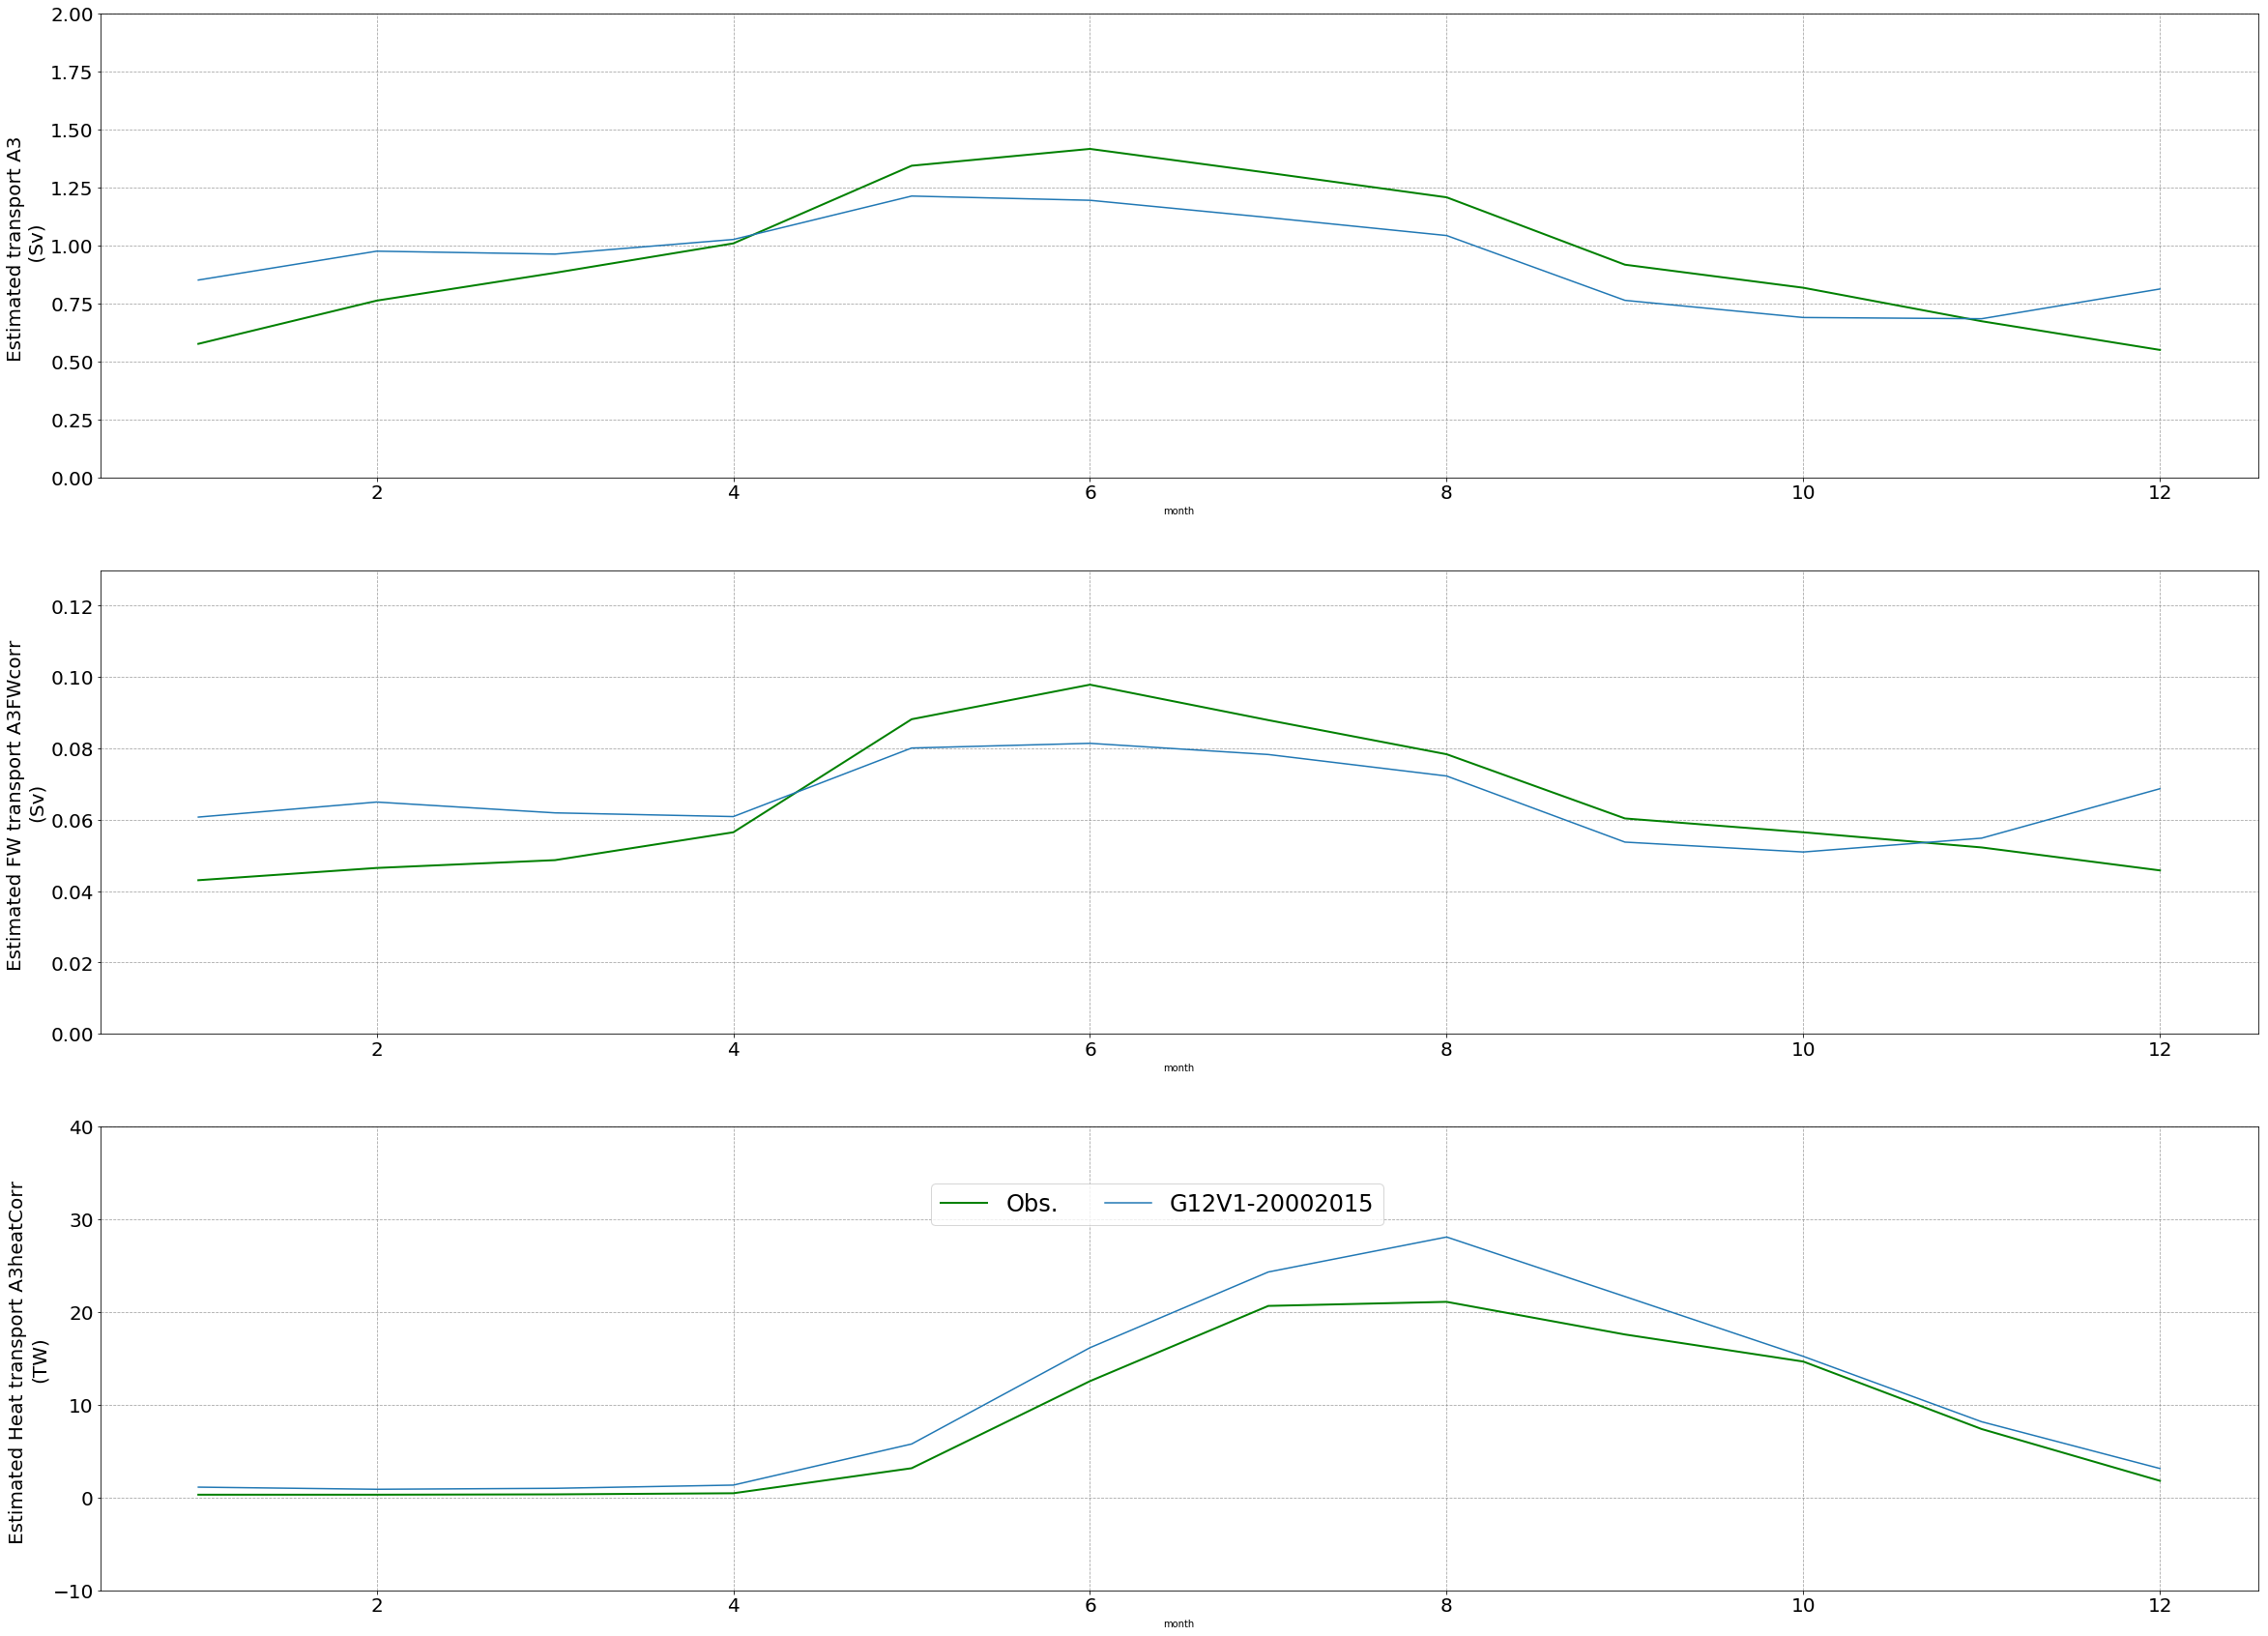

In [41]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015
calmean_longs=1993  ; calmean_longe=2020

# Volume transport
#------------------------------------------------------------------------------------
plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
ax=plt.subplot(311)
ds_Obs['transp_A3MeanCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.)
(ds_M['transp_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot()
#(ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r')


Mean_TP_GLORYS12V1AExMercL75_S=np.array((ds_M['transp_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_TP_GLORYS12V1AExMercL75_L=np.array((ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_TP_GLORYS12V1AExMercL75_S, Mean_TP_GLORYS12V1AExMercL75_L)
print(Mean_TP_GLORYS12V1AExMercL75_S)
#ax.text('2008',2.25   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',2.25   ,str(np.round(np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(transp_A3MeanCorr_std)+' Sv',color='g',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1)),color='r',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='r',size=24)



#plt.xlim(['2000','2020'])
plt.ylim([0.,2.])
plt.ylabel('Estimated transport A3 \n (Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
# FW transport
#------------------------------------------------------------------------------------
ax=plt.subplot(312)
ds_Obs['FW_A3FWcorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.)
(ds_M['FW_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot()
#(ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r')

Mean_FW_GLORYS12V1AExMercL75_S=np.array((ds_M['FW_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_FW_GLORYS12V1AExMercL75_L=np.array((ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_FW_GLORYS12V1AExMercL75_S, Mean_FW_GLORYS12V1AExMercL75_L)
print(Mean_FW_GLORYS12V1AExMercL75_S)
#ax.text('2008',0.17   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',0.17   ,str(np.round(np.nanmean(FW_A3FWcorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]) ,decimals=2))+'+/-'+str(FW_A3FWcorr_std)+' Sv',color='g',size=24)
#ax.text('2012',0.17   ,str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Mean,decimals=2))+'+/-'+str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='k',size=24)
#ax.text('2017',0.17   ,'Sref=34.8',color='k',size=24)
#plt.xlim(['2000','2020'])
plt.ylim([0.0,0.13])
plt.ylabel('Estimated FW transport A3FWcorr \n'+r'(Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# Heat transport
#------------------------------------------------------------------------------------
ax=plt.subplot(313)
ds_Obs['HT_A3heatCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean().plot(color='g',linewidth=2.,label='Obs.')
(ds_M['HT_GLORYS12V1AExMercL75_COR']*1e-12).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').plot(label='G12V1-20002015')
#(ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').plot(color='r',label='G12V1-19932020')

Mean_HT_GLORYS12V1AExMercL75_S=np.array((ds_M['HT_GLORYS12V1AExMercL75_COR']*1e-12).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_HT_GLORYS12V1AExMercL75_L=np.array((ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_HT_GLORYS12V1AExMercL75_S, Mean_HT_GLORYS12V1AExMercL75_L)
print(Mean_HT_GLORYS12V1AExMercL75_S)
#ax.text('2008',64.   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',64.   ,str(np.round(np.nanmean(HT_A3heatCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(HT_A3heatCorr_std)+' TW',color='g',size=24)
#ax.text('2012',64.   ,str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+'+/-'+str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+' TW',color='k',size=24)
#ax.text('2017',65.   ,'Tref=-1.9 DegC',color='k',size=24)

#plt.xlim(['2000','2020'])
plt.ylabel('Estimated Heat transport A3heatCorr \n'+r'(TW)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
plt.ylim([-10.,40.])

plt.legend(bbox_to_anchor=(0., 0.8, 0.6, 0.102),ncol=3, fontsize=24)

#plt.tight_layout()
dosavefig=False
#if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_SeasCyc_March2023_y'+str(calmean_s)+str(calmean_e)+'.pdf')
if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_SeasCycCOR_March2023_y20002020.pdf')
dosavefig=False



In [84]:
ds_M

<xarray.Dataset>
Dimensions:                          (time: 276)
Coordinates:
  * time                             (time) datetime64[ns] 2000-01-15 ... 2022-12-15
Data variables:
    transp_GLORYS12V1AExMercL75      (time) float64 6.308e+05 ... 1.57e+06
    FW_GLORYS12V1AExMercL75          (time) float64 3.382e+04 ... 1.194e+05
    HT_GLORYS12V1AExMercL75          (time) float64 4.674e+11 ... 1.164e+13
    transp_GLORYS12V1AExMercL75_COR  (time) float64 2.807e+05 ... 1.215e+06
    FW_GLORYS12V1AExMercL75_COR      (time) float64 1.3e+04 ... 8.804e+04
    HT_GLORYS12V1AExMercL75_COR      (time) float64 1.397e+11 ... 9.006e+12

>>>>>> # Now Plot the time series over the longest period 1993-2022

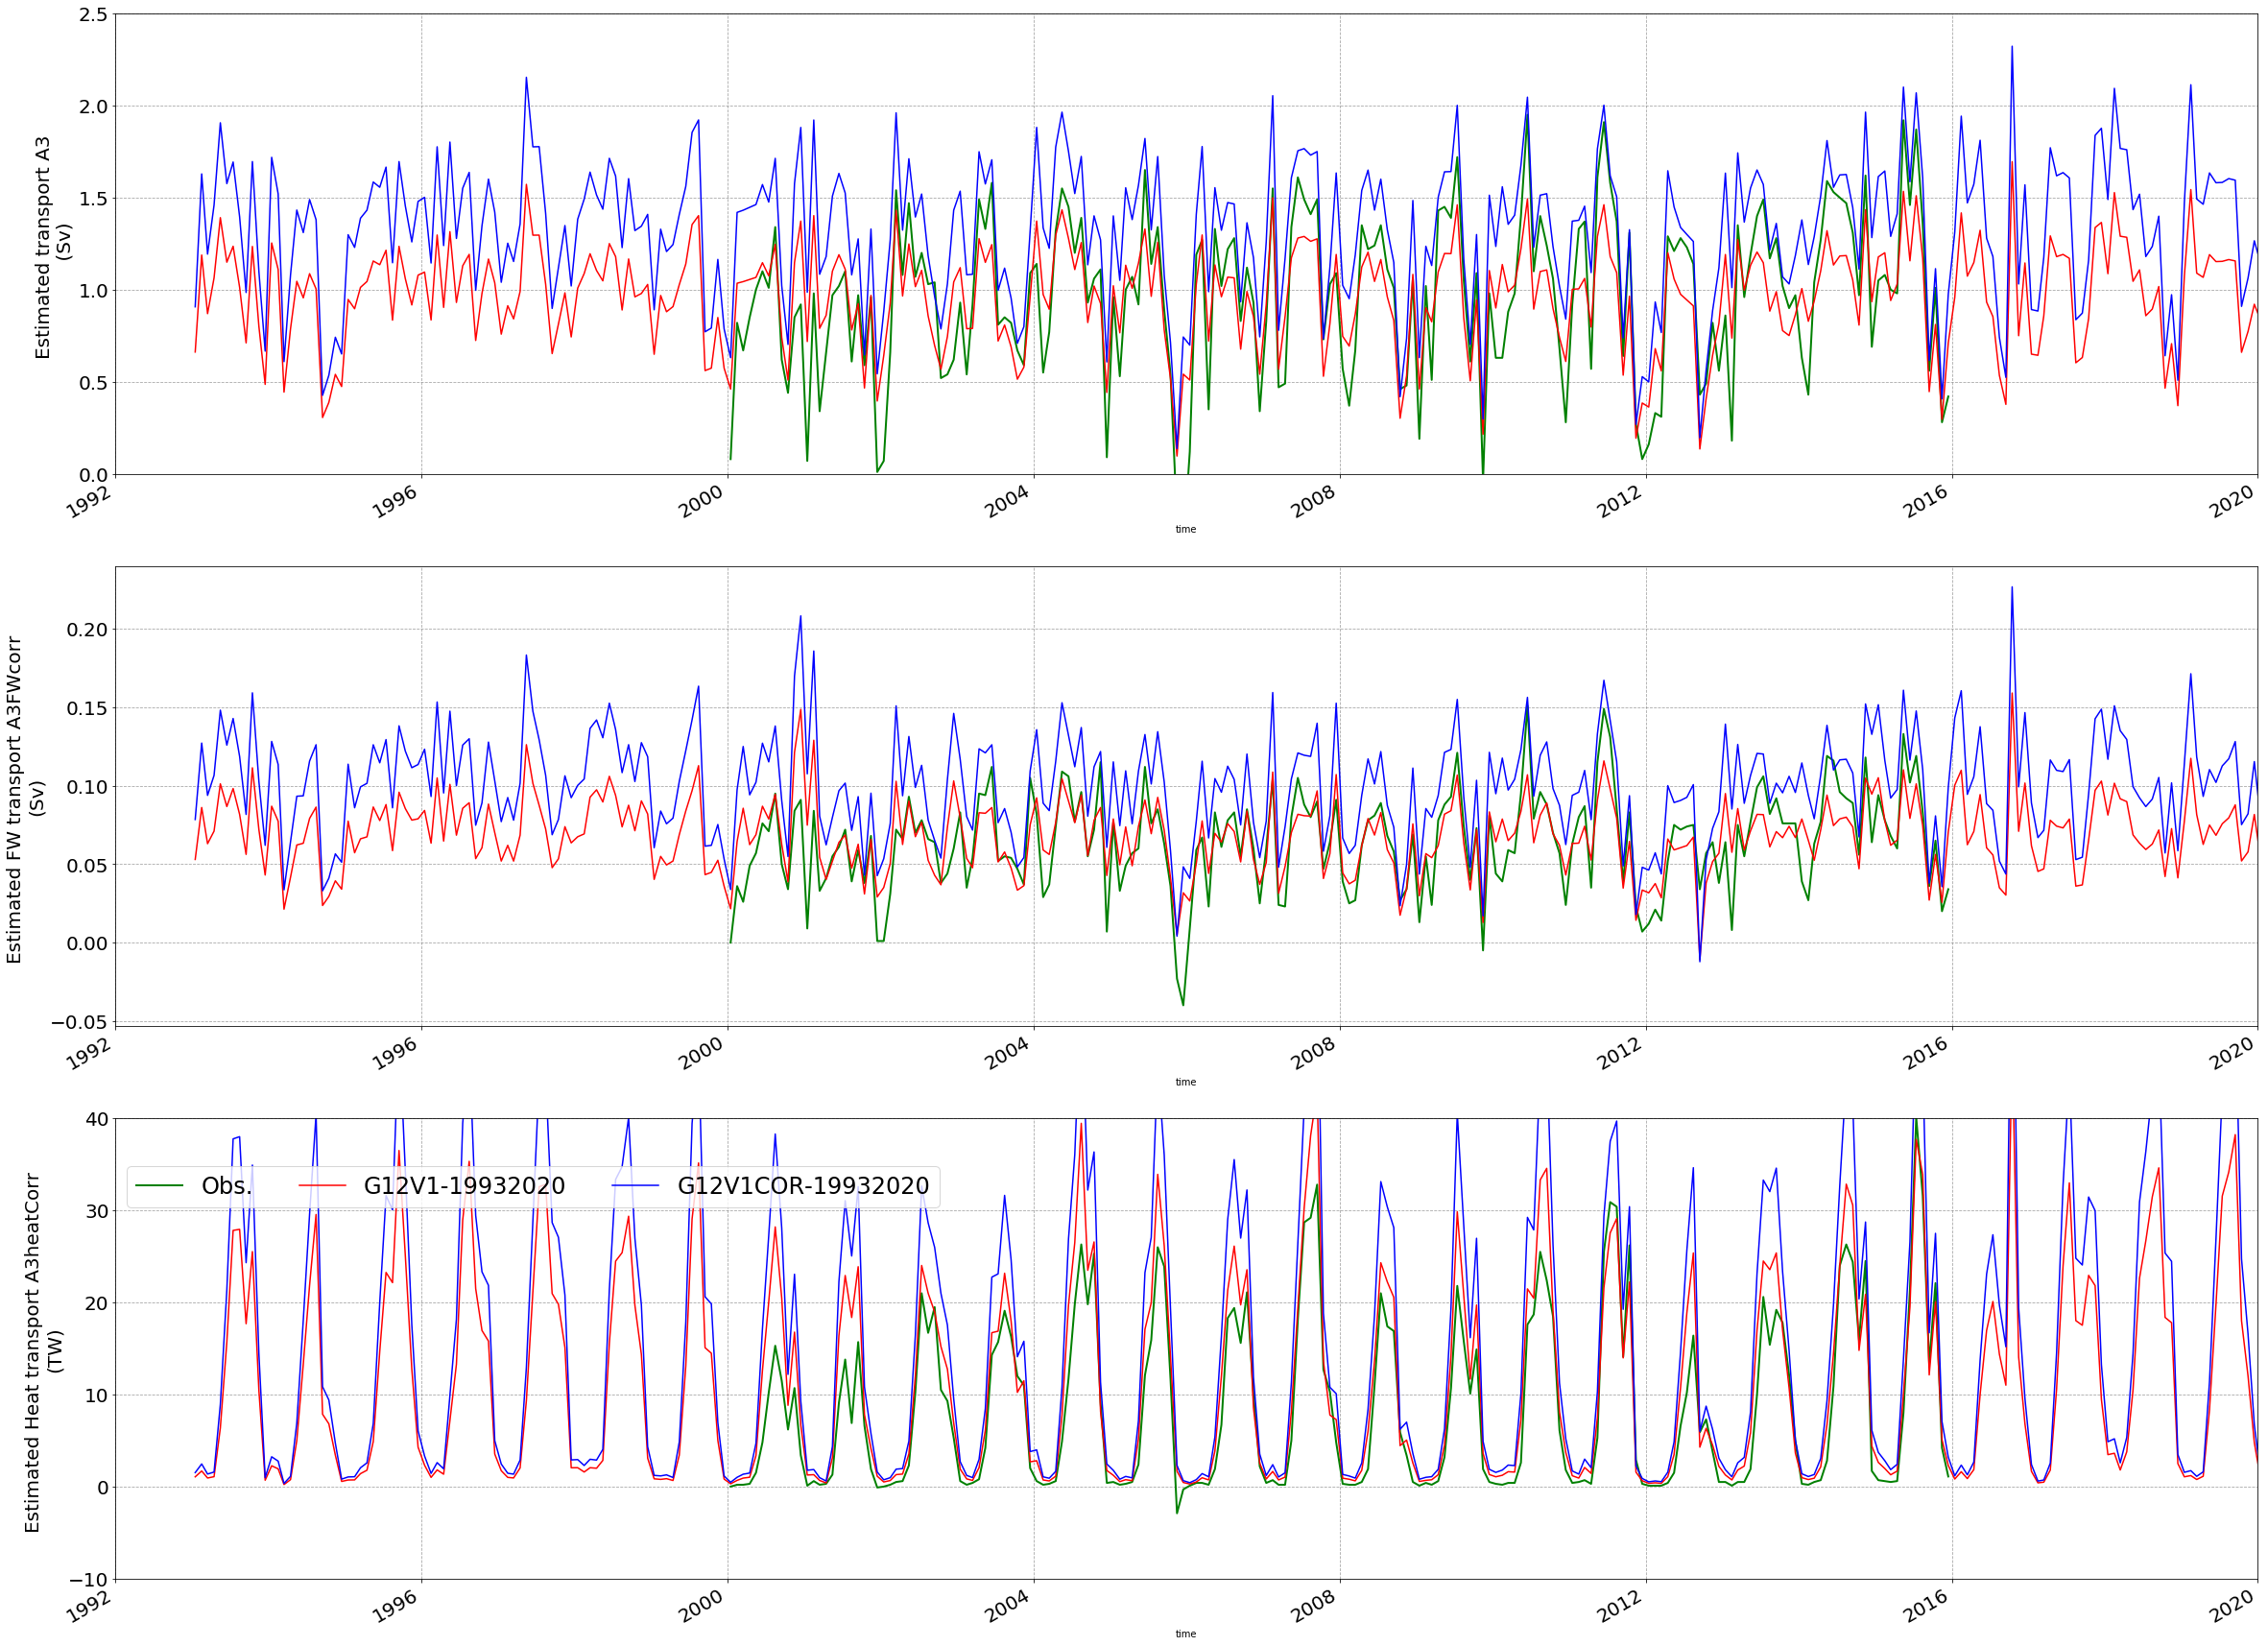

In [40]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015
calmean_longs=1993  ; calmean_longe=2020

# Volume transport
#------------------------------------------------------------------------------------
plt.title('Bering Strait Monthly means \n Obs. from Woodgate et al. PO2017', size=25)
ax=plt.subplot(311)
ds_Obs['transp_A3MeanCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).plot(color='g',linewidth=2.)
(ds_M['transp_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='r')
(ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='b')

#Mean_TP_GLORYS12V1AExMercL75_S=np.array((ds_M['transp_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_TP_GLORYS12V1AExMercL75_L=np.array((ds_M['transp_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_TP_GLORYS12V1AExMercL75_S, Mean_TP_GLORYS12V1AExMercL75_L)
#print(Mean_TP_GLORYS12V1AExMercL75_S)
#ax.text('2008',2.25   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',2.25   ,str(np.round(np.nanmean(transp_A3MeanCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(transp_A3MeanCorr_std)+' Sv',color='g',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1)),color='r',size=24)
#ax.text('2012',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_S,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='b',size=24)
#ax.text('2014',2.2   ,str(np.round(Mean_TP_GLORYS12V1AExMercL75_L,decimals=1))+'+/-'+str(np.round(ds_M['transp_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='r',size=24)

plt.xlim(['1992','2020'])
plt.ylim([0.,2.5])
plt.ylabel('Estimated transport A3 \n (Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
# FW transport
#------------------------------------------------------------------------------------
ax=plt.subplot(312)
ds_Obs['FW_A3FWcorr'].sel(time=slice(str(calmean_s),str(calmean_e))).plot(color='g',linewidth=2.)
(ds_M['FW_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='r')
(ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='b')

#Mean_FW_GLORYS12V1AExMercL75_S=np.array((ds_M['FW_GLORYS12V1AExMercL75_COR']*1e-6).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_FW_GLORYS12V1AExMercL75_L=np.array((ds_M['FW_GLORYS12V1AExMercL75']*1e-6).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_FW_GLORYS12V1AExMercL75_S, Mean_FW_GLORYS12V1AExMercL75_L)
#print(Mean_FW_GLORYS12V1AExMercL75_S)
                                               
#ax.text('2008',0.17   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',0.17   ,str(np.round(np.nanmean(FW_A3FWcorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]) ,decimals=2))+'+/-'+str(FW_A3FWcorr_std)+' Sv',color='g',size=24)
#ax.text('2012',0.17   ,str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Mean,decimals=2))+'+/-'+str(np.round(ds_M['FW_GLORYS12V1AExMercL75'].Std,decimals=2))+' Sv',color='k',size=24)
#ax.text('2017',0.17   ,'Sref=34.8',color='k',size=24)

plt.xlim(['1992','2020'])
#plt.ylim([-0.05,0.2])
plt.ylabel('Estimated FW transport A3FWcorr \n'+r'(Sv)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)

# Heat transport
#------------------------------------------------------------------------------------
ax=plt.subplot(313)
ds_Obs['HT_A3heatCorr'].sel(time=slice(str(calmean_s),str(calmean_e))).plot(color='g',linewidth=2.,label='Obs.')
(ds_M['HT_GLORYS12V1AExMercL75_COR']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='r',label='G12V1-19932020')
(ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).plot(color='b',label='G12V1COR-19932020')

#Mean_HT_GLORYS12V1AExMercL75_S=np.array((ds_M['HT_GLORYS12V1AExMercL75_COR']*1e-12).sel(time=slice(str(calmean_s),str(calmean_e))).groupby('time.month').mean('time').mean())
#Mean_HT_GLORYS12V1AExMercL75_L=np.array((ds_M['HT_GLORYS12V1AExMercL75']*1e-12).sel(time=slice(str(calmean_longs),str(calmean_longe))).groupby('time.month').mean('time').mean())

#print(Mean_HT_GLORYS12V1AExMercL75_S, Mean_HT_GLORYS12V1AExMercL75_L)
#print(Mean_HT_GLORYS12V1AExMercL75_S)
#ax.text('2008',64.   ,'Mean '+str(calmean_s)+'-'+str(calmean_e)+' : ',color='k',size=24)
#ax.text('2010',64.   ,str(np.round(np.nanmean(HT_A3heatCorr[(calmean_s-syear_Obs)*12:(calmean_e-syear_Obs)*12]),decimals=1))+'+/-'+str(HT_A3heatCorr_std)+' TW',color='g',size=24)
#ax.text('2012',64.   ,str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+'+/-'+str(np.round(ds_M['HT_GLORYS12V1AExMercL75'].Std,decimals=2))+' TW',color='k',size=24)
#ax.text('2017',65.   ,'Tref=-1.9 DegC',color='k',size=24)

plt.xlim(['1992','2020'])
plt.ylabel('Estimated Heat transport A3heatCorr \n'+r'(TW)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(True,linestyle='--', color='grey',alpha=0.7)
plt.ylim([-10.,40.])

plt.legend(bbox_to_anchor=(0., 0.8, 0.6, 0.102),ncol=3, fontsize=24)


#plt.tight_layout()
dosavefig=True
#if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_SeasCyc_March2023_y'+str(calmean_s)+str(calmean_e)+'.pdf')
if dosavefig : plt.savefig('./FIGURES/BeringStrait_GLORYS12V1_COR_March2023_y19932020.pdf')
dosavefig=False




# Seasonal section plots 

In [67]:
# Store in a same dataset all required data 
ds_new['vomecrty_init']=(('time_counter','z','y','x'), GVcmp_data_readEx )
ds_new['vomecrty_init'].attrs['_FillValue']= -9999.
ds_new['vomecrty'].attrs['_FillValue']= -9999.

In [81]:
ds_new['vomecrty'].attrs

OrderedDict([('_FillValue', -9999.0)])

In [89]:
ds_new.info()

xarray.Dataset {
dimensions:
	time_counter = 10227 ;
	x = 42 ;
	y = 10 ;
	z = 75 ;

variables:
	float64 vomecrty(time_counter, z, y, x) ;
		vomecrty:_FillValue = -9999.0 ;
	datetime64[ns] time_counter(time_counter) ;
	float64 vomecrty_init(time_counter, z, y, x) ;
		vomecrty_init:_FillValue = -9999.0 ;

// global attributes:
}

In [71]:
# Compite the 3D seasonal cycle before plotting sections 
ds_3D_Seas=ds_new.groupby('time_counter.season').mean('time_counter')

<bound method Dataset.info of <xarray.Dataset>
Dimensions:        (season: 4, x: 42, y: 10, z: 75)
Coordinates:
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: x, y, z
Data variables:
    vomecrty       (season, z, y, x) float64 -9.999e+03 ... -9.999e+03
    vomecrty_init  (season, z, y, x) float64 -9.999e+03 ... -9.999e+03>

In [91]:
ds_3D_Seas['vomecrty_init'].attrs['_FillValue']= -9999.
ds_3D_Seas['vomecrty'].attrs['_FillValue']= -9999.

In [92]:
ds_3D_Seas.info()

xarray.Dataset {
dimensions:
	season = 4 ;
	x = 42 ;
	y = 10 ;
	z = 75 ;

variables:
	float64 vomecrty(season, z, y, x) ;
		vomecrty:_FillValue = -9999.0 ;
	float64 vomecrty_init(season, z, y, x) ;
		vomecrty_init:_FillValue = -9999.0 ;
	object season(season) ;

// global attributes:
}

In [93]:
ds_3D_Seas['vomecrty']

<xarray.DataArray 'vomecrty' (season: 4, z: 75, y: 10, x: 42)>
array([[[[-9999., ..., -9999.],
         ...,
         [-9999., ..., -9999.]],

        ...,

        [[-9999., ..., -9999.],
         ...,
         [-9999., ..., -9999.]]],


       ...,


       [[[-9999., ..., -9999.],
         ...,
         [-9999., ..., -9999.]],

        ...,

        [[-9999., ..., -9999.],
         ...,
         [-9999., ..., -9999.]]]])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: z, y, x
Attributes:
    _FillValue:  -9999.0

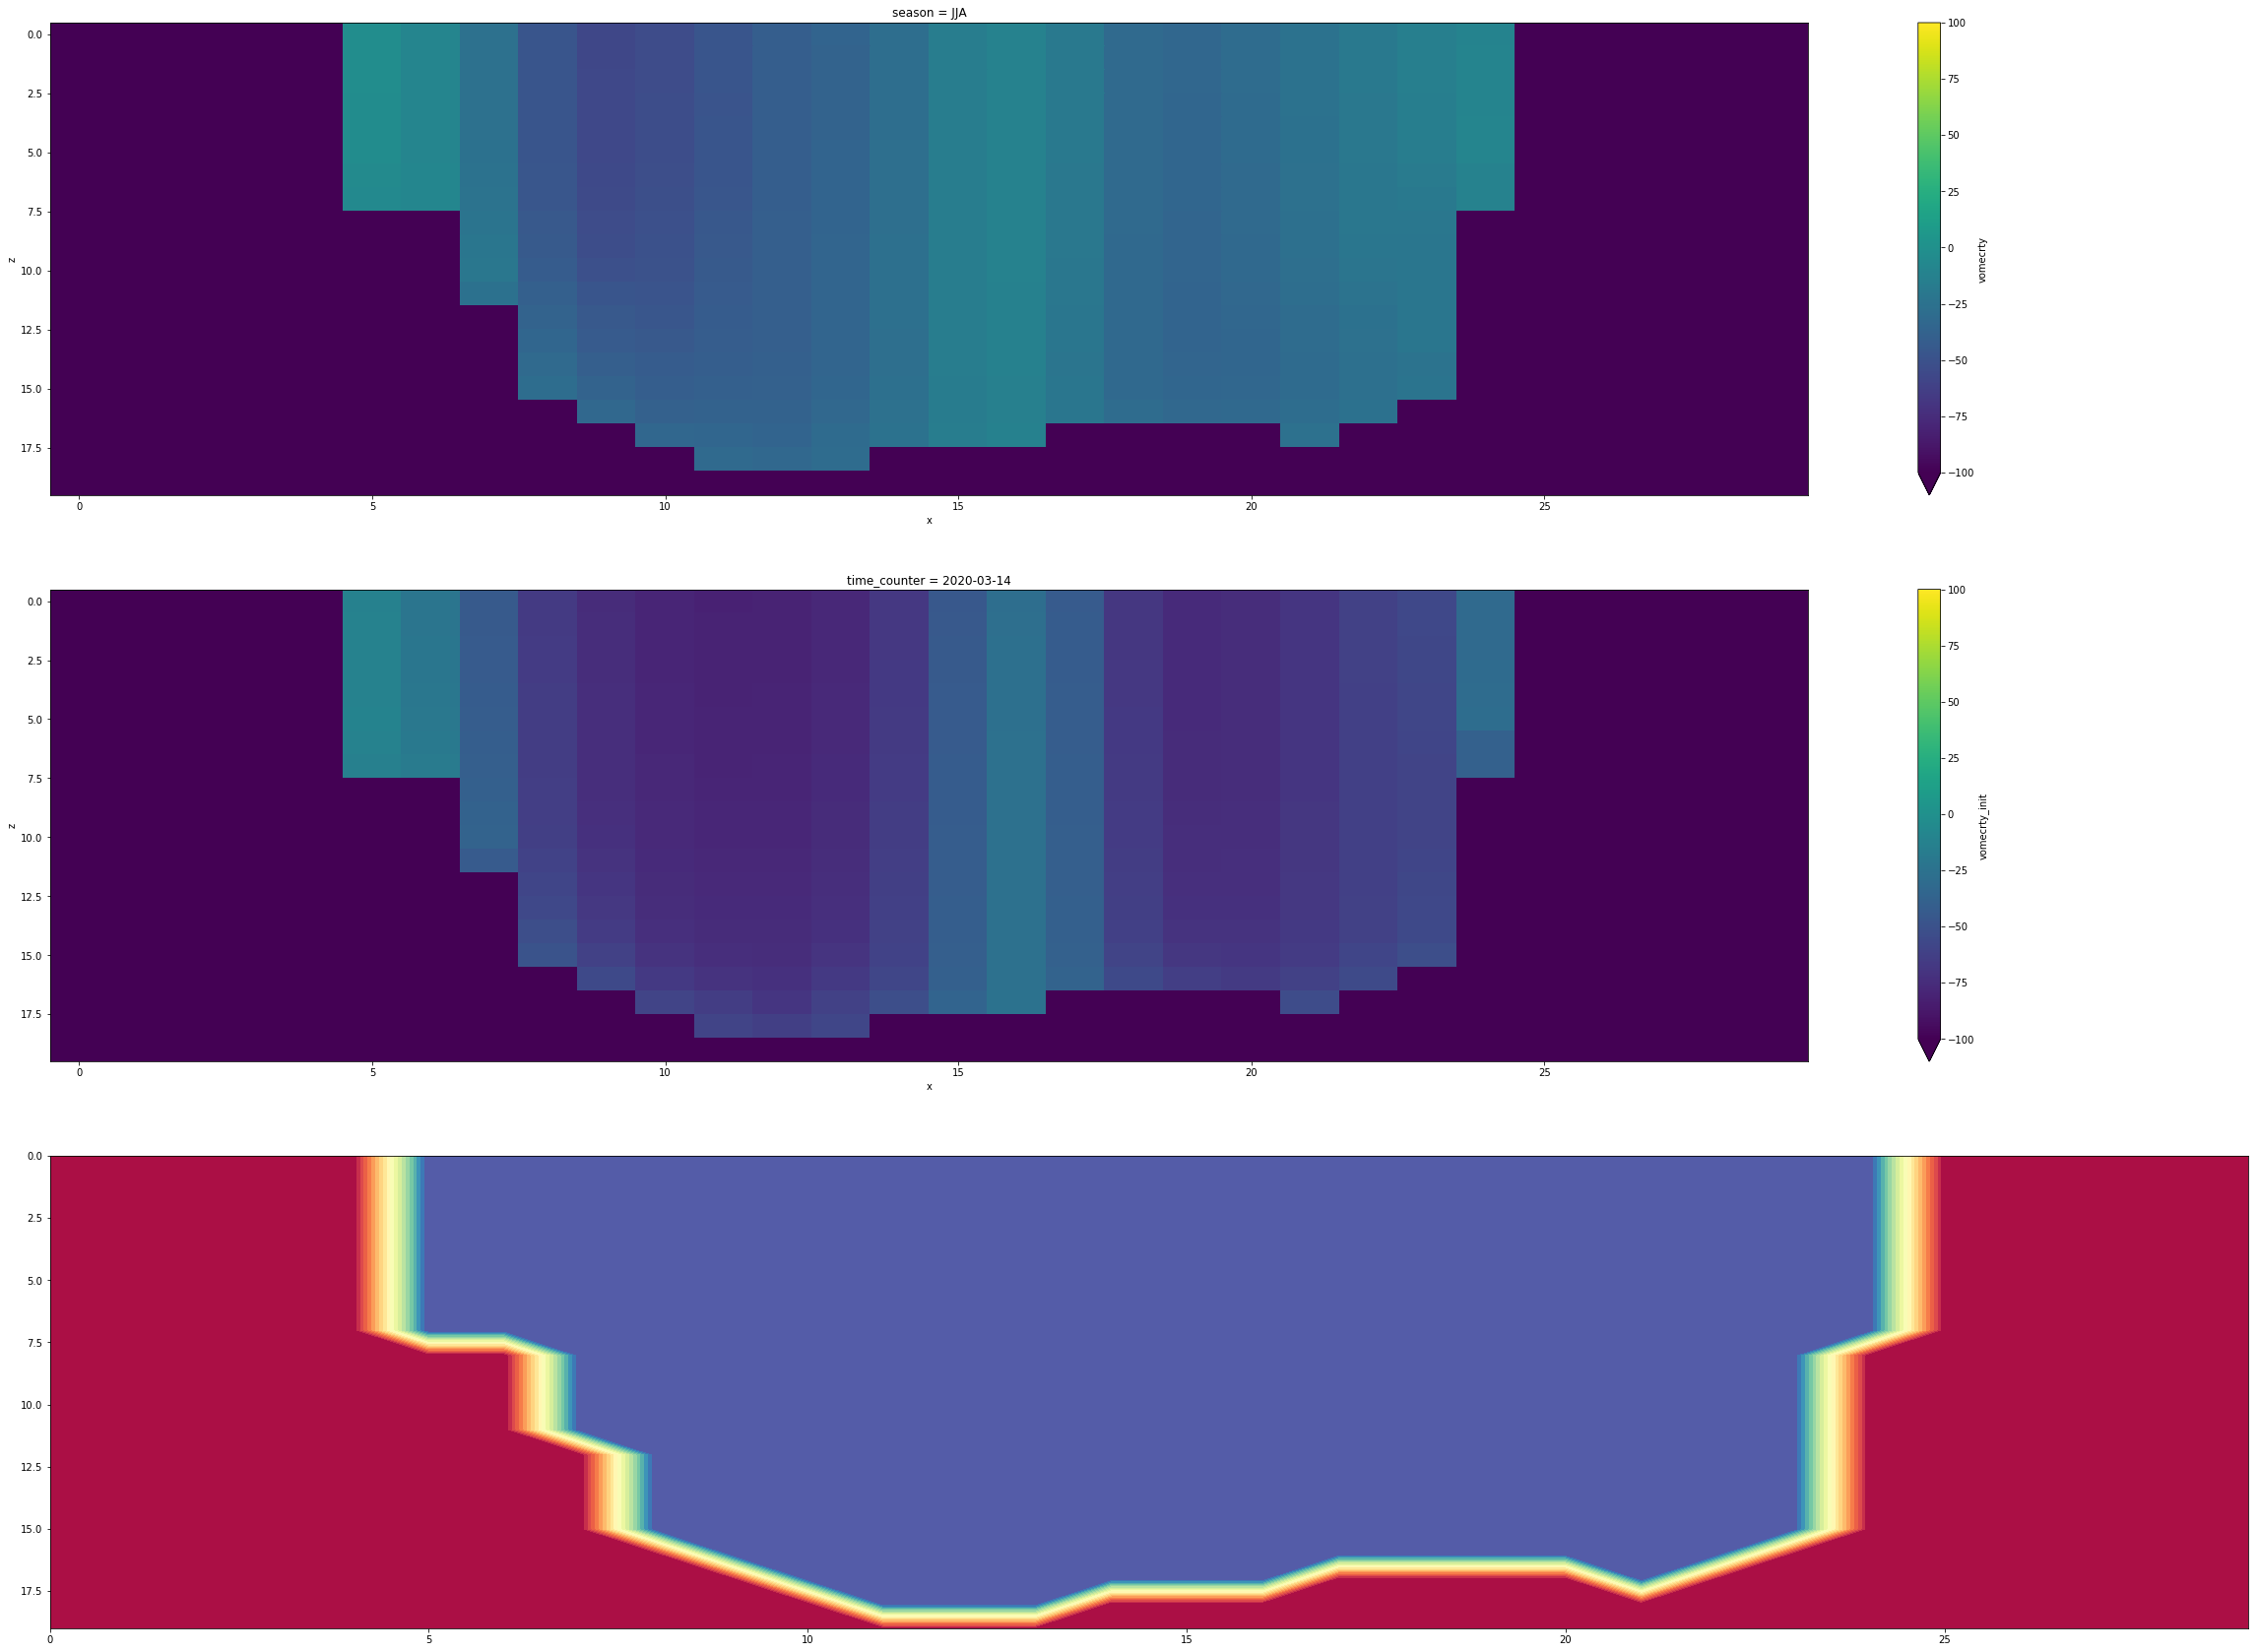

In [102]:
plt.figure(figsize=(40,30))
calmean_s=2000  ; calmean_e=2015
calmean_longs=1993  ; calmean_longe=2020

# Volume transport
#------------------------------------------------------------------------------------
ax=plt.subplot(311)
(ds_3D_Seas['vomecrty']*1e2).sel(season='JJA').isel(z=slice(0,20),y=0,x=slice(5,35)).plot(vmin=-100,vmax=100.)
ax.invert_yaxis()


ax=plt.subplot(312)
(ds_new['vomecrty_init']*1e2).sel(time_counter='2020-03-14').isel(z=slice(0,20),y=0,x=slice(5,35)).plot(vmin=-100,vmax=100.)
ax.invert_yaxis()

ax=plt.subplot(313)
plt.contourf((ds_new['vomecrty_init']*1e2).sel(time_counter='2020-03-14').isel(z=slice(0,20),y=0,x=slice(5,35)),levels=20,cmap='Spectral')
ax.invert_yaxis()

# Le calcul de la moyenne T/S ci-dessous le long de la section n'est pas bon 

In [ ]:
TSmean_ts=False
if TSmean_ts: 
    plt.clf()
    plt.figure(figsize=(40,30))
    calmean=2010
    ax=plt.subplot(211)
    plt.title('Bering Strait Monthly means ', size=25)
    plt.plot(yearsGLORYS12V1AEx,Tmean_GLORYS12V1AEx,'g',linewidth=0.6)
    plt.plot(yearsMJMgd16,Tmean_MJMgd16,'r',linewidth=0.7)
    #ax.text(2009,2.25   ,'Mean 2010-2015: ',color='k',size=20)
    #ax.text(2012,2.25   ,str(np.round(np.nanmean(Tmean_MJMgd16[(calmean-syear_MJMgd16)*12+1::])*1e-6 ,decimals=1)),color='r',size=20)
    #ax.text(2013,2.25   ,str(np.round(np.nanmean(Tmean_GLORYS12V1AEx[(calmean-syear_GLORYS12V1AEx)*12+1:(2015-2010+1)*12+1])*1e-6 ,decimals=1)),color='g',size=20)
    #plt.ylim([-0.5,2.5])

    plt.xlim([2008,2018])
    plt.ylabel('Mean T \n (DegC)',size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid(True,linestyle='--', color='grey',alpha=0.7)

    ax=plt.subplot(212)
    plt.plot(yearsGLORYS12V1AEx,Smean_GLORYS12V1AEx,'g',linewidth=0.6, label='G12V1-AEx')
    plt.plot(yearsMJMgd16,Smean_MJMgd16,'r',linewidth=0.7, label='MJMgd16')
    #ax.text(2009,2.25   ,'Mean 2010-2015: ',color='k',size=20)
    #ax.text(2012,2.25   ,str(np.round(np.nanmean(Smean_MJMgd16[(calmean-syear_MJMgd16)*12+1::])*1e-6 ,decimals=1)),color='r',size=20)
    #ax.text(2013,2.25   ,str(np.round(np.nanmean(Smean_GLORYS12V1AEx[(calmean-syear_GLORYS12V1AEx)*12+1:(2015-2010+1)*12+1])*1e-6 ,decimals=1)),color='g',size=20)
    #plt.ylim([-0.5,2.5])

    plt.xlim([2008,2018])
    plt.ylabel('Mean S \n (-)',size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid(True,linestyle='--', color='grey',alpha=0.7)

    plt.legend(bbox_to_anchor=(0., 0.8, 0.8, 0.102),ncol=2)

    dosavefig=False
    if dosavefig : plt.savefig('BeringStrait_TSmonthlymeans_Oct2019_y20102018.pdf')
    dosavefig=False

>>>> Plot vertical sections 

In [ ]:
#-------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------
Bering_sections=False
if Bering_sections :
# Plot sections
    make_VTS_section(bdy='north')


In [ ]:
mcolors.TABLEAU_COLORS

In [ ]:
import matplotlib.colors as mcolors

x = np.linspace(0, 2*np.pi)
y = np.sin(x)

mcolors.TABLEAU_COLORS

plt.figure(figsize=(20,15))
A = 1.
for color in mcolors.TABLEAU_COLORS:
    plt.plot(x, A * y, c=color, label=color)
    A *= 0.8
plt.legend()

>>>>>>